## Real Data Divergence Rates (Eight Calibrations) - Reduced Major Axis Regression

## 1. All Nodes Divergence Rates

### Data Cleaning and Processing 

In [1]:
import ete3
import re
import os
import subprocess
import inflect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import rpy2.robjects.numpy2ri
import rpy2.robjects as ro
from rpy2 import robjects
from rpy2.robjects import r, pandas2ri
import rpy2.robjects.packages as rpackages
from rpy2.robjects import FloatVector

ModuleNotFoundError: No module named 'rpy2'

In [ ]:
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
R = rpy2.robjects.r
lmodel2 = importr('lmodel2') 

In [ ]:
with open("September_10_2019_Modified_Eight_Calibrations_Gene_PhyloBayes_Posterior_sample.datedist") as f:
    content = f.readlines()
content = [x.strip() for x in content] 
tree = ete3.Tree(content[0],format=1)

In [ ]:
def Remove_Duplicate(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list

In [ ]:
leaf_list = []
for leaf in tree.get_leaves():
    leaf_list.append(leaf.name)

In [ ]:
leaf_node_list = []
for node in tree.traverse():
    if node.is_leaf():
        leaf_node_list.append(node.name)

In [ ]:
def node_age_on_each_tree(tree):
    leaf_node_list = []
    internal_age_list = []
    for node in tree.traverse():
        if node.is_leaf():
            leaf_node_list.append(node.name)
        else:
            internal_age_list.append(node.name)
    return  internal_age_list 

In [ ]:
All_Sample_Age_List = []
for i in range (0, len(content)):
    tree = ete3.Tree(content[i],format=1)
    One_Age_List = node_age_on_each_tree(tree)
    All_Sample_Age_List.append(One_Age_List)
df=pd.DataFrame(All_Sample_Age_List)

In [ ]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = df[0:3840] 
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

In [ ]:
3840/0.8

In [ ]:
len(df)

In [ ]:
bin_size = 100

### Divergence of Node Numbers in Each Bin (NOT Cumulative Number of Nodes)

In [ ]:
bin_size = 100

In [ ]:
his_data_eight_calibration_1 = np.histogram(negative_age_list_1, bins=3000/bin_size, range = (-3000, 0))
age_interval_list = his_data_eight_calibration_1[1]
age_interval_list = age_interval_list.tolist()
middle_age_interval_list = [left_age + (bin_size/float(2)) for left_age in age_interval_list]
del middle_age_interval_list[-1]
middle_age_interval_list

node_number_each_interval = his_data_eight_calibration_1[0]
node_number_each_interval = node_number_each_interval.tolist()

In [19]:
# Divide node number in each bin by the total number of trees
# Let's call this "normalized node number in a bin" 
node_number_each_interval_normalized_by_tree_number = [i / float(len(df_list_1)) for i in node_number_each_interval]

# Divide normalized node number in a bin by the bin size (that is, node number pre Myr)
# Let's call this "normalized node density"
node_density_each_interval_normalized_by_tree_number = [i / float(bin_size) for i in node_number_each_interval_normalized_by_tree_number]

In [20]:
# The average omega here is calculated from theroectial formula: average omega = (log(N2)-log(N1))/t, 
# where t is bin_size. The average_omega is calculated from the two end points when t = 
#-2950 (i.e. -3000Ma + 50 Ma) and t = -50 Ma; actually, 50 Ma = 0.5 * bin_size.
noncumulative_density_avergae_omega = (np.log(node_number_each_interval_normalized_by_tree_number[-1]) - np.log(node_number_each_interval_normalized_by_tree_number[0])) / float(3000-bin_size)
noncumulative_density_avergae_omega

0.0013527777676541665

In [21]:
# Take the logarithm of each  "normalized node density"
log_node_density_each_interval_normalized_by_tree_number = [np.log(i) for i in node_density_each_interval_normalized_by_tree_number]

In [22]:
# Change the list of "middle point at each time interval" to an array
array_middle_age_interval_list = np.array(middle_age_interval_list)

# Change the list of "normalized node density" to an array
array_node_density_each_interval_normalized_by_tree_number = np.array(node_density_each_interval_normalized_by_tree_number)

whole_array_middle_age_interval_list = array_middle_age_interval_list

In [23]:
# Data here are the slopes computed using SMA (alos called reduced major axis regresion) in "lmodel2" in R
slope_array = np.array([0.0004089477, 0.0010468298, 0.0004497527, 0.0030626575, 0.0008683399, 0.0034827923])

whole_slope_array = slope_array

In [24]:
# Data here are the intercepts computed using SMA (alos called reduced major axis regresion) in "lmodel2" in R
intercept_array = np.array([-3.0483709, -1.3684021, -2.7591503,  0.6883361, -1.3923985, -0.1524506])

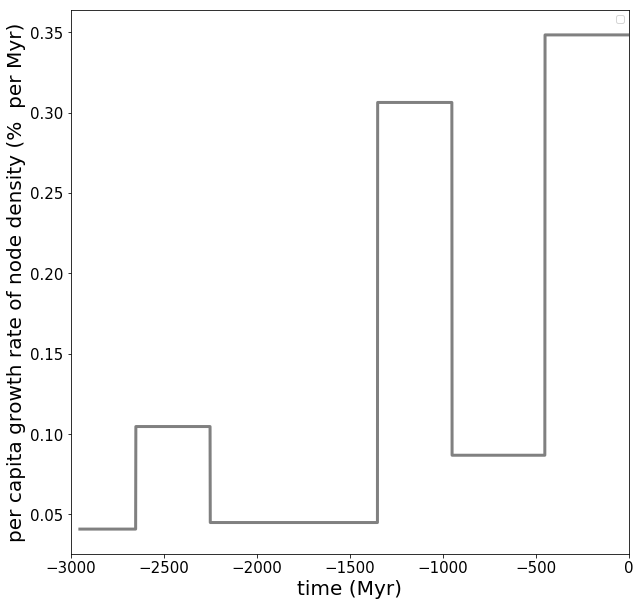

In [25]:
#definition of the pdf
def f_whole_X(x):
    if x >= whole_array_middle_age_interval_list[0] and x <= whole_array_middle_age_interval_list[3]:
        return whole_slope_array[0]
    elif x >= whole_array_middle_age_interval_list[3] and x <= whole_array_middle_age_interval_list[7]:
        return whole_slope_array[1]
    elif x >= whole_array_middle_age_interval_list[7] and x <= whole_array_middle_age_interval_list[16]:
        return whole_slope_array[2]
    elif x >= whole_array_middle_age_interval_list[16] and x <= whole_array_middle_age_interval_list[20]:
        return whole_slope_array[3]
    elif x >= whole_array_middle_age_interval_list[20] and x <= whole_array_middle_age_interval_list[25]:
        return whole_slope_array[4]
    else:
        return whole_slope_array[5]


#vectorize f_X, so that it takes arrays and inputs!
f_X_whole_vec = np.vectorize(f_whole_X)


#visualize pdf
plt.figure(figsize=(10,10))
x_whole = np.linspace(min(whole_array_middle_age_interval_list), 0 , 5000)
plt.plot(x_whole, 100*f_X_whole_vec(x_whole), color='gray', linewidth=3)
plt.xlim(-3000, 0)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend()
#plt.yscale('log', basey= 10)
plt.savefig('GrowthofLogNodeNumbers.jpg', dpi=500)
plt.show()

## 2. HGT Divergence Rates

### Data Cleaning and Processing 

In [26]:
with open("September_10_2019_Modified_Eight_Calibrations_Gene_PhyloBayes_Posterior_sample.datedist") as f:
    content = f.readlines()
content = [x.strip() for x in content] 

In [27]:
tree = ete3.Tree(content[0],format=1)
tree

Tree node '3123.34' (0x7fc820b6cf1)

In [28]:
def Remove_Duplicate(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list

In [29]:
leaf_list = []
for leaf in tree.get_leaves():
    leaf_list.append(leaf.name)

In [30]:
leaf_node_list = []
for node in tree.traverse():
    if node.is_leaf():
        leaf_node_list.append(node.name)

In [31]:
def node_age_on_each_tree(tree):
    leaf_node_list = []
    internal_age_list = []
    for node in tree.traverse():
        if node.is_leaf():
            leaf_node_list.append(node.name)
        else:
            internal_age_list.append(node.name)
    return internal_age_list 

In [32]:
All_Sample_Age_List = []
for i in range (0, len(content)):
    tree = ete3.Tree(content[i],format=1)
    One_Age_List = node_age_on_each_tree(tree)
    All_Sample_Age_List.append(One_Age_List)
df=pd.DataFrame(All_Sample_Age_List)

In [33]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = df[0:3840] 
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

## Divergence Rates of all HGT Nodes

### Extract HGT Nodes from the Tree

In [34]:
with open("Labelled-Gene_Tree.treefile") as f:
    content = f.readlines()

In [35]:
reconciliation_gene_tree = ete3.Tree(content[0],format=8)

In [36]:
print reconciliation_gene_tree


                  /-Streptomycesfulvoviolaceus_WP043457100
                 |
                 |   /-Acidimicrobiaceaebacterium_HAM02975
                 |  |
               /-|  |               /-Mycobacteriumtriplex_WP036469389
              |  |  |            /-|
              |  |  |         /-|   \-Mycobacteriumgenavense_WP025737195
              |  |  |        |  |
              |   \-|      /-|   \-Mycobacteriumconspicuum_WP085231027
              |     |     |  |
              |     |     |  |   /-Mycobacteriumarosiense_WP083064574
              |     |     |   \-|
              |     |   /-|     |   /-Mycobacteriummarseillense_WP067169648
              |     |  |  |      \-|
              |     |  |  |         \-Mycobacteriummarseillense_WP083017212
              |      \-|  |
              |        |   \-Mycobacteriumpalustre_WP085078461
              |        |
              |         \-Mycobacteriumsp12747610_WP066975764
              |
              |               /-Fran

In [37]:
root = [reconciliation_gene_tree.get_tree_root()]

all_node_TreeInformation = reconciliation_gene_tree.get_descendants()
all_node_TreeInformation = root + all_node_TreeInformation

In [38]:
all_node_TreeInformation

[Tree node 'm1' (0x7fc820736f1),
 Tree node 'm2' (0x7fc820736d1),
 Tree node 'm301' (0x7fc81faad21),
 Tree node 'm3' (0x7fc820736e9),
 Tree node 'm230' (0x7fc81fa25e9),
 Tree node 'm302' (0x7fc81faad2d),
 Tree node 'm521' (0x7fc81fabcd5),
 Tree node 'm4' (0x7fc820736fd),
 Tree node 'm227' (0x7fc81fa25d9),
 Tree node 'm231' (0x7fc81fa25f5),
 Tree node 'm286' (0x7fc81fb67d5),
 Tree node 'm303' (0x7fc81faad31),
 Tree node 'm396' (0x7fc81fc21b1),
 Tree node 'm522' (0x7fc81fabce5),
 Tree node 'm561' (0x7fc823fe179),
 Tree node 'm5' (0x7fc820736d5),
 Tree node 'm100' (0x7fc817eccb1),
 Tree node 'SphingomonasspJJA5_WP072597474' (0x7fc81fa25ed),
 Tree node 'SphingomonasspJJA5_WP072597460' (0x7fc81fa25f1),
 Tree node 'm232' (0x7fc81fa25f9),
 Tree node 'm279' (0x7fc81fb67bd),
 Tree node 'm287' (0x7fc81fb67e9),
 Tree node 'm292' (0x7fc81fb67f5),
 Tree node 'm304' (0x7fc81faad35),
 Tree node 'Thermoflexushugenholtzii_WP098503884' (0x7fc81fc21c5),
 Tree node 'm397' (0x7fc81fc21c9),
 Tree node 'Acid

In [39]:
f = open('all_node_TreeInformation', 'r')
lines = f.read()
all_nodes_age_list = re.findall(r"'(.*?)'", lines)
all_nodes_age_list = [i for i in all_nodes_age_list]

In [40]:
reconciliation_gene_tree.get_leaves()

[Tree node 'Streptomycesfulvoviolaceus_WP043457100' (0x7fc82adcfe9),
 Tree node 'Acidimicrobiaceaebacterium_HAM02975' (0x7fc82adcfe5),
 Tree node 'Mycobacteriumtriplex_WP036469389' (0x7fc817c6f5d),
 Tree node 'Mycobacteriumgenavense_WP025737195' (0x7fc817c6f61),
 Tree node 'Mycobacteriumconspicuum_WP085231027' (0x7fc817c6f65),
 Tree node 'Mycobacteriumarosiense_WP083064574' (0x7fc817c6f6d),
 Tree node 'Mycobacteriummarseillense_WP067169648' (0x7fc817c6f75),
 Tree node 'Mycobacteriummarseillense_WP083017212' (0x7fc817c6f79),
 Tree node 'Mycobacteriumpalustre_WP085078461' (0x7fc817c6f7d),
 Tree node 'Mycobacteriumsp12747610_WP066975764' (0x7fc817c6f81),
 Tree node 'FrankiaspEUN1f_WP006543802' (0x7fc817c6f9d),
 Tree node 'Frankiaasymbiotica_ONH24204' (0x7fc817c6fa9),
 Tree node 'Frankiaasymbiotica_WP081438887' (0x7fc817c6fad),
 Tree node 'Cryptosporangiumaurantiacum_WP084742125' (0x7fc817c6fb1),
 Tree node 'Streptomycesscabrisporus_WP078974072' (0x7fc817c6fb9),
 Tree node 'Streptomycessca

In [41]:
g = open('leaves_children_string', 'r')
lines = g.read()
leaves_nodes_age_list = re.findall(r"'(.*?)'", lines)
leaves_nodes_age_list = [i for i in leaves_nodes_age_list]

In [42]:
all_internal_nodes_list = [x for x in all_nodes_age_list if x not in leaves_nodes_age_list]

In [43]:
HGT_internal_nodes = pd.read_csv('transfer_weights.txt', header=None, delim_whitespace=True)[1]
HGT_internal_nodes_list = HGT_internal_nodes.tolist()
HGT_internal_nodes_list = list(set(HGT_internal_nodes_list))

In [44]:
HGT_nodes_index = [all_nodes_age_list.index(i) for i in HGT_internal_nodes_list]

In [45]:
# Note that if we let HGT_index = a leave index, then what returned 
# by "tree.get_common_ancestor(HGT_internal_node.get_leaf_names())" will be the root of the tree
HGT_node_on_AgeTree_list = []
for HGT_index in HGT_nodes_index: # iterate the index of HGT node on the reconciliation gene tree
    HGT_internal_node = all_node_TreeInformation[HGT_index] # get ihe information of the HGT node on the reconciliation gene tree
    HGT_internal_node_ancestor = HGT_internal_node.get_leaf_names() # get the leave descendants of this HGT node
    HGT_node_on_AgeTree = tree.get_common_ancestor(HGT_internal_node_ancestor) # use leave descendants of this HGT node to get the HGT node information on the "age tree"\
    HGT_node_on_AgeTree_list.append(HGT_node_on_AgeTree)

In [46]:
a = open('whole_HGT_node_on_AgeTree_list', 'r')
lines = a.read() 
HGT_age_list_row_one = re.findall(r"'(\d+\.\d+|\d+)'", lines)
#HGT_age_list_row_one = [float(i) for i in HGT_age_list_row_one]

In [47]:
AgeTree_first_row = df.iloc[0,:].tolist()

In [48]:
HGT_nodes_index_on_AgeTree = [AgeTree_first_row.index(i) for i in HGT_age_list_row_one]

In [49]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = df.iloc[:,HGT_nodes_index_on_AgeTree]
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

In [50]:
min_gae_HGT_age = np.min(negative_age_list_1)
min_gae_HGT_age  

-3968.66

### Divergence of Node Numbers in Each Bin (NOT Cumulative Number of Nodes)

In [51]:
bin_size = 100
his_data_eight_calibration_1 = np.histogram(negative_age_list_1, bins=3000/bin_size, range = (-3000, 0))
age_interval_list = his_data_eight_calibration_1[1]
age_interval_list = age_interval_list.tolist()
middle_age_interval_list = [left_age + (bin_size/float(2)) for left_age in age_interval_list]
del middle_age_interval_list[-1]
middle_age_interval_list

node_number_each_interval = his_data_eight_calibration_1[0]
node_number_each_interval = node_number_each_interval.tolist()

In [52]:
# Divide node number in each bin by the total number of trees
# Let's call this "normalized node number in a bin" 
node_number_each_interval_normalized_by_tree_number = [i / float(len(df_list_1)) for i in node_number_each_interval]

# Divide normalized node number in a bin by the bin size (that is, node number pre Myr)
# Let's call this "normalized node density"
node_density_each_interval_normalized_by_tree_number = [i / float(bin_size) for i in node_number_each_interval_normalized_by_tree_number]

In [53]:
# The average omega here is calculated from theroectial formula: average omega = (log(N2)-log(N1))/t, 
# where t is bin_size. The average_omega is calculated from the two end points when t = 
#-2950 (i.e. -3000Ma + 50 Ma) and t = -50 Ma; actually, 50 Ma = 0.5 * bin_size.
noncumulative_density_avergae_omega = (np.log(node_number_each_interval_normalized_by_tree_number[-1]) - np.log(node_number_each_interval_normalized_by_tree_number[0])) / float(3000-bin_size)
noncumulative_density_avergae_omega

0.0011293924217680306

In [54]:
# Take the logarithm of each  "normalized node density"
log_node_density_each_interval_normalized_by_tree_number = [np.log(i) for i in node_density_each_interval_normalized_by_tree_number]

In [55]:
# Change the list of "middle point at each time interval" to an array
array_log_node_density_each_interval_normalized_by_tree_number = np.array(log_node_density_each_interval_normalized_by_tree_number)
allHGT_array_log_node_density_each_interval_normalized_by_tree_number = array_log_node_density_each_interval_normalized_by_tree_number
allHGT_array_log_node_density_each_interval_normalized_by_tree_number

array([-5.16719773, -4.94304966, -4.7612759 , -4.60647312, -4.34120464,
       -4.07546148, -3.91685236, -3.8581614 , -3.8789812 , -3.88251477,
       -3.8670845 , -3.81600285, -3.77600447, -3.70536883, -3.62277965,
       -3.55702916, -3.54306701, -3.45290194, -3.20703218, -2.87720877,
       -2.56489728, -2.44574603, -2.26481776, -2.31873035, -2.13742382,
       -2.22105311, -1.98720426, -1.70562478, -1.57399285, -1.89195971])

In [60]:
# Change the list of "middle point at each time interval" to an array
array_middle_age_interval_list = np.array(middle_age_interval_list)
HGT_array_middle_age_interval_list = array_middle_age_interval_list

In [64]:
# Data here are the slopes computed using SMA (alos called reduced major axis regresion) in "lmodel2" in R
slope_array = np.array([0.0021151616,  0.0001416548,  0.0003775656,  0.0006272431, 0.0024531240,  0.0007278398,  0.0022432078, -0.0031796686])

HGT_slope_array = slope_array

In [65]:
# Data here are the intercepts computed using SMA (alos called reduced major axis regresion) in "lmodel2" in R
intercept_array = np.array([1.0606762, -3.5761609, -3.1180271, -2.6686230, -0.3167058, -1.8044583, -1.1990064, -2.0509431])
allHGT_intercept_array = intercept_array 
allHGT_intercept_array

array([ 1.0606762, -3.5761609, -3.1180271, -2.668623 , -0.3167058,
       -1.8044583, -1.1990064, -2.0509431])

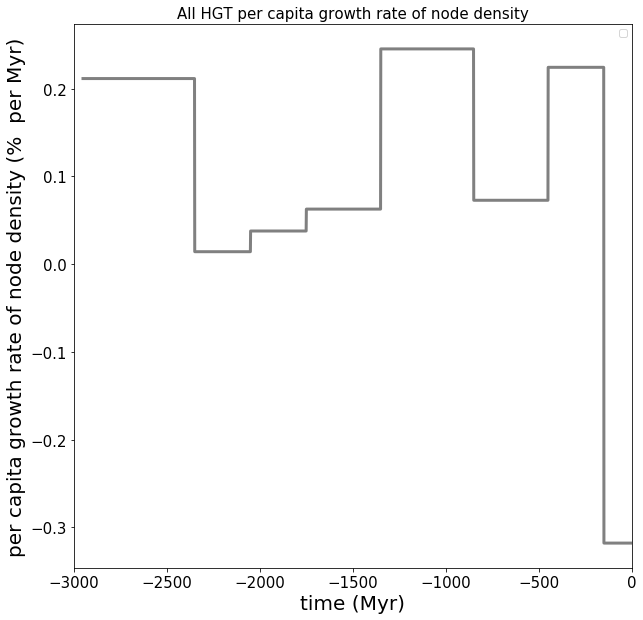

In [66]:
#definition of the pdf
def f_HGT_X(x):
    if x >= array_middle_age_interval_list[0] and x <= array_middle_age_interval_list[6]:
        return HGT_slope_array[0]
    elif x >= array_middle_age_interval_list[6] and x <= array_middle_age_interval_list[9]:
        return HGT_slope_array[1]
    elif x >= array_middle_age_interval_list[9] and x <= array_middle_age_interval_list[12]:
        return HGT_slope_array[2]
    elif x >= array_middle_age_interval_list[12] and x <= array_middle_age_interval_list[16]:
        return HGT_slope_array[3]
    elif x >= array_middle_age_interval_list[16] and x <= array_middle_age_interval_list[21]:
        return HGT_slope_array[4]
    elif x >= array_middle_age_interval_list[21] and x <= array_middle_age_interval_list[25]:
        return HGT_slope_array[5]
    elif x >= array_middle_age_interval_list[25] and x < array_middle_age_interval_list[28]:
        return HGT_slope_array[6]
    else:
        return HGT_slope_array[7]


#vectorize f_X, so that it takes arrays and inputs!
f_HGT_X_vec = np.vectorize(f_HGT_X)

#visualize pdf
plt.figure(figsize=(10,10))
x_HGT = np.linspace(min(HGT_array_middle_age_interval_list), 0 , 5000)
plt.plot(x_HGT, 100*f_HGT_X_vec(x_HGT), color='gray', linewidth=3)
plt.xlim(-3000,0)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend()
plt.title("All HGT per capita growth rate of node density", size='15')
plt.savefig('AllHGT divergence rate growth (non-cumulative).jpg')
plt.show()

## Divergence Rates of SAR202 Nodes

In [67]:
with open("September_10_2019_Modified_Eight_Calibrations_Gene_PhyloBayes_Posterior_sample.datedist") as f:
    content = f.readlines()
content = [x.strip() for x in content] 

In [68]:
tree = ete3.Tree(content[0],format=1)

In [69]:
def Remove_Duplicate(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list

In [70]:
leaf_list = []
for leaf in tree.get_leaves():
    leaf_list.append(leaf.name)

In [71]:
leaf_node_list = []
for node in tree.traverse():
    if node.is_leaf():
        leaf_node_list.append(node.name)

In [72]:
def node_age_on_each_tree(tree):
    leaf_node_list = []
    internal_age_list = []
    for node in tree.traverse():
        if node.is_leaf():
            leaf_node_list.append(node.name)
        else:
            internal_age_list.append(node.name)
    return internal_age_list 

In [73]:
All_Sample_Age_List = []
for i in range (0, len(content)):
    tree = ete3.Tree(content[i],format=1)
    One_Age_List = node_age_on_each_tree(tree)
    All_Sample_Age_List.append(One_Age_List)
df=pd.DataFrame(All_Sample_Age_List)

In [74]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = df[0:3840] 
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

### Extract SAR202 Species from the Tree

In [75]:
tree = ete3.Tree(content[0],format=1)
print tree


            /-SphingomonasspJJA5_WP072597474
         /-|
        |   \-SphingomonasspJJA5_WP072597460
        |
        |         /-Dactylosporangiumaurantiacum_WP052386210
        |        |
        |        |         /-RhodococcusspS217_WP109333591
        |      /-|      /-|
        |     |  |   /-|   \-Pseudonocardiaautotrophica_WP051737931
        |     |  |  |  |
        |     |   \-|   \-Frankiaasymbiotica_WP076822049
        |     |     |
        |     |      \-Amycolatopsiscirci_WP116202507
        |     |
        |     |      /-Gordoniawestfalica_WP074853526
        |     |     |
        |     |   /-|      /-Pseudonocardiaautotrophica_WP081924729
        |     |  |  |   /-|
        |   /-|  |  |  |   \-Pseudonocardiaautotrophica_WP037053683
        |  |  |  |   \-|
        |  |  |  |     |   /-Ilumatobacternonamiensis_WP040492204
        |  |  |  |      \-|
        |  |  |  |         \-Acidimicrobialesbacteriummtb01_TEX45168
        |  |  |  |
        |  |  |  |      /-Geod

In [76]:
SAR202_clade = tree.get_common_ancestor(['SAR202clusterbacteriumIo17ChloroG3_PKB65232', 'SAR202clusterbacteriumIo17ChloroG9_PKB79601'])

In [77]:
children = SAR202_clade.get_descendants()

In [78]:
f = open('children_string', 'r')
lines = f.read()
SAR202_age_list_row_one = re.findall(r"\d+\.\d+", lines)
SAR202_age_list_row_one = [float(i) for i in SAR202_age_list_row_one]

In [79]:
df_list_row_one = df.iloc[0]
df_list_row_one = df_list_row_one.values.tolist()
df_list_row_one = [float(i) for i in df_list_row_one]

In [80]:
Internal_node_SAR202_clade_list = []
for element in SAR202_age_list_row_one:
    if element in df_list_row_one:
        Internal_node_SAR202_clade_list.append(df_list_row_one.index(element))

In [81]:
SAR202_age_list =  df.iloc[:, Internal_node_SAR202_clade_list]

In [82]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = SAR202_age_list [0:3840] 
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

In [83]:
min_gae_SAR202_age = np.min(negative_age_list_1)
min_gae_SAR202_age  

-2338.53

### Divergence of Node Numbers in Each Bin (NOT Cumulative Number of Nodes)

In [84]:
bin_size = 100
his_data_eight_calibration_1 = np.histogram(negative_age_list_1, bins=2400/bin_size, range = (-2400, 0))
age_interval_list = his_data_eight_calibration_1[1]
age_interval_list = age_interval_list.tolist()
middle_age_interval_list = [left_age + (bin_size/float(2)) for left_age in age_interval_list]
del middle_age_interval_list[-1]
middle_age_interval_list

node_number_each_interval = his_data_eight_calibration_1[0]
node_number_each_interval = node_number_each_interval.tolist()

In [85]:
# Divide node number in each bin by the total number of trees
# Let's call this "normalized node number in a bin" 
node_number_each_interval_normalized_by_tree_number = [i / float(len(df_list_1)) for i in node_number_each_interval]

# Divide normalized node number in a bin by the bin size (that is, node number pre Myr)
# Let's call this "normalized node density"
node_density_each_interval_normalized_by_tree_number = [i / float(bin_size) for i in node_number_each_interval_normalized_by_tree_number]

In [86]:
# The average omega here is calculated from theroectial formula: average omega = (log(N2)-log(N1))/t, 
# where t is bin_size. The average_omega is calculated from the two end points when t = 
#-2950 (i.e. -3000Ma + 50 Ma) and t = -50 Ma; actually, 50 Ma = 0.5 * bin_size.
noncumulative_density_avergae_omega = (np.log(node_number_each_interval_normalized_by_tree_number[-1]) - np.log(node_number_each_interval_normalized_by_tree_number[0])) / float(2350-bin_size)
noncumulative_density_avergae_omega

0.0037108819319956123

In [87]:
node_density_each_interval_normalized_by_tree_number

[7.8125e-06,
 2.6041666666666665e-05,
 0.00013541666666666666,
 0.00034895833333333334,
 0.0008671875,
 0.0020078125,
 0.003572916666666667,
 0.0051666666666666675,
 0.005174479166666667,
 0.0030390625,
 0.0018671875,
 0.0033385416666666667,
 0.008658854166666667,
 0.016927083333333332,
 0.024114583333333335,
 0.025546875,
 0.032820312500000004,
 0.019856770833333332,
 0.020072916666666666,
 0.014651041666666666,
 0.0201171875,
 0.032674479166666666,
 0.0559765625,
 0.03303125]

In [88]:
# Take the logarithm of each  "normalized node density"
log_node_density_each_interval_normalized_by_tree_number = [np.log(i) for i in node_density_each_interval_normalized_by_tree_number]

In [89]:
# Change the list of "middle point at each time interval" to an array
array_log_node_density_each_interval_normalized_by_tree_number = np.array(log_node_density_each_interval_normalized_by_tree_number)
SAR_array_log_node_density_each_interval_normalized_by_tree_number = array_log_node_density_each_interval_normalized_by_tree_number
SAR_array_log_node_density_each_interval_normalized_by_tree_number 

array([-11.75978554, -10.55581274,  -8.90715411,  -7.96055803,
        -7.05025534,  -6.21070946,  -5.63437302,  -5.26552754,
        -5.26401659,  -5.7962062 ,  -6.28332199,  -5.70222119,
        -4.74917288,  -4.07884038,  -3.7249385 ,  -3.66724028,
        -3.41670767,  -3.91921023,  -3.9083838 ,  -4.22324384,
        -3.90618073,  -3.42116096,  -2.8828222 ,  -3.4103012 ])

In [90]:
# Change the list of "middle point at each time interval" to an array
array_middle_age_interval_list = np.array(middle_age_interval_list)
SAR_array_middle_age_interval_list = array_middle_age_interval_list
SAR_array_middle_age_interval_list 

array([-2350., -2250., -2150., -2050., -1950., -1850., -1750., -1650.,
       -1550., -1450., -1350., -1250., -1150., -1050.,  -950.,  -850.,
        -750.,  -650.,  -550.,  -450.,  -350.,  -250.,  -150.,   -50.])

In [91]:
# Data here are the slopes computed using SMA (alos called reduced major axis regresion) in "lmodel2" in R
slope_array = np.array([ 0.009588683, -0.003792769,  0.007597382,  0.002114454, -0.002585000,  0.004534816, -0.005274790])
SAR_slope_array = slope_array
SAR_slope_array 

array([ 0.00958868, -0.00379277,  0.00759738,  0.00211445, -0.002585  ,
        0.00453482, -0.00527479])

In [92]:
# Data here are the intercepts computed using SMA (alos called reduced major axis regresion) in "lmodel2" in R
intercept_array = np.array([11.259344, -11.341421,   3.913469,  -1.818923, -5.417887 , -2.247907,  -3.674041])
SAR_intercept_array = intercept_array
SAR_intercept_array

array([ 11.259344, -11.341421,   3.913469,  -1.818923,  -5.417887,
        -2.247907,  -3.674041])

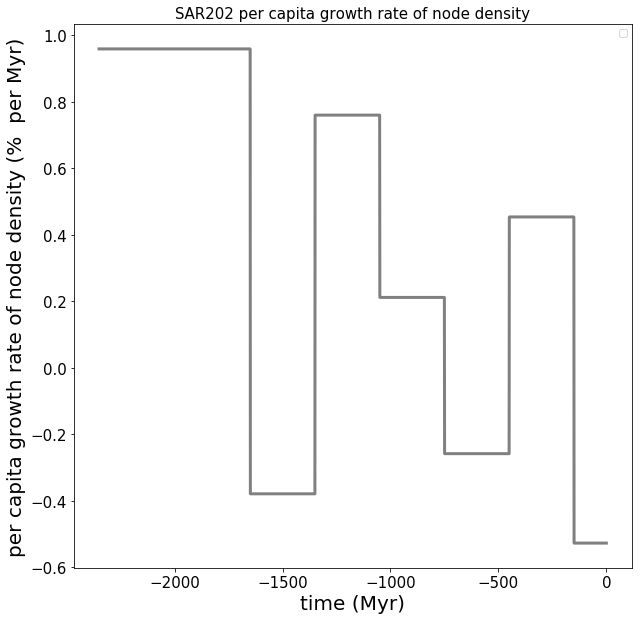

In [93]:
#definition of the pdf
def f_SAR_X(x):
    if x >= SAR_array_middle_age_interval_list[0] and x <= SAR_array_middle_age_interval_list[7]:
        return SAR_slope_array[0]
    elif x >= SAR_array_middle_age_interval_list[7] and x <= SAR_array_middle_age_interval_list[10]:
        return SAR_slope_array[1]
    elif x >= SAR_array_middle_age_interval_list[10] and x <= SAR_array_middle_age_interval_list[13]:
        return SAR_slope_array[2]
    elif x >= SAR_array_middle_age_interval_list[13] and x <= SAR_array_middle_age_interval_list[16]:
        return SAR_slope_array[3]
    elif x >= SAR_array_middle_age_interval_list[16] and x <= SAR_array_middle_age_interval_list[19]:
        return SAR_slope_array[4]
    elif x >= SAR_array_middle_age_interval_list[19] and x < SAR_array_middle_age_interval_list[22]:
        return SAR_slope_array[5]
    else:
        return SAR_slope_array[6]
    
#vectorize f_X, so that it takes arrays and inputs!
f_SAR_X_vec = np.vectorize(f_SAR_X)

#visualize pdf
plt.figure(figsize=(10,10))
SAR_x = np.linspace(min(SAR_array_middle_age_interval_list), 0 , 5000)
plt.plot(SAR_x, 100*f_SAR_X_vec(SAR_x), color='gray', linewidth=3)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend()
plt.title("SAR202 per capita growth rate of node density", size='15')
plt.savefig('SAR202 divergence rate growth (non-cumulative).jpg')
plt.show()

In [94]:
#definition of the piecewise fitting lines
def g_SAR202_X(x):
    if x >= SAR_array_middle_age_interval_list[0] - bin_size/2 and x < SAR_array_middle_age_interval_list[7] + bin_size/2:
        return  x * SAR_slope_array[0]  + SAR_intercept_array[0]
    elif x >= SAR_array_middle_age_interval_list[7] - bin_size/2 and x < SAR_array_middle_age_interval_list[10] + bin_size/2.:
        return  x * SAR_slope_array[1]  + SAR_intercept_array[1]
    elif x >= SAR_array_middle_age_interval_list[10] - bin_size/2 and x < SAR_array_middle_age_interval_list[13] + bin_size/2.:
        return  x * SAR_slope_array[2]  + SAR_intercept_array[2]
    elif x >= SAR_array_middle_age_interval_list[13] - bin_size/2 and x < SAR_array_middle_age_interval_list[16] + bin_size/2.:
        return  x * SAR_slope_array[3] + SAR_intercept_array[3]
    elif x >= SAR_array_middle_age_interval_list[16] - bin_size/2 and x < SAR_array_middle_age_interval_list[19] + bin_size/2.:
        return  x * SAR_slope_array[4]  + SAR_intercept_array[4]
    elif x >= SAR_array_middle_age_interval_list[19] - bin_size/2 and x < SAR_array_middle_age_interval_list[22] + bin_size/2.:
        return  x * SAR_slope_array[5]  + SAR_intercept_array[5]
    else:
        return  x * SAR_slope_array[6]  + SAR_intercept_array[6]

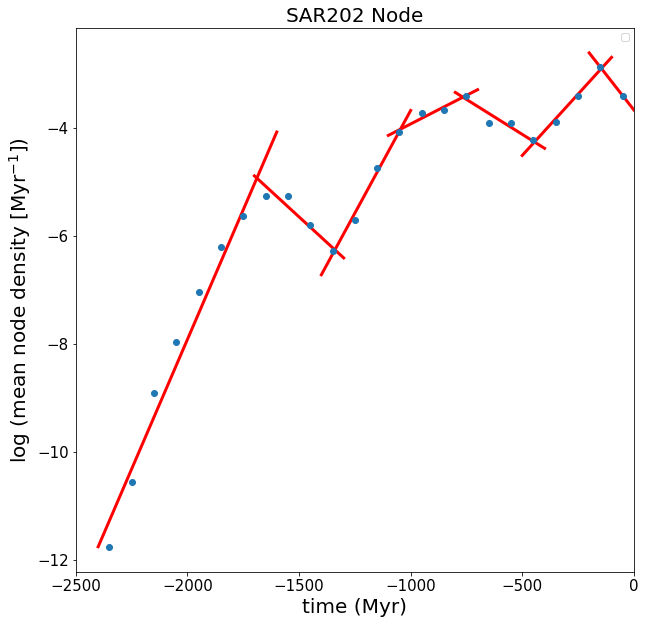

In [95]:
SAR_age_index = [0, 7, 10, 13, 16, 19, 22, 23]

g_SAR202_X_vec = np.vectorize( g_SAR202_X)

#visualize pdf
plt.subplots(1, 1, figsize=(10, 10))
for i in range (0, len(SAR_age_index)-1):
    x = np.linspace(SAR_array_middle_age_interval_list[SAR_age_index[i]] - (bin_size/2.), SAR_array_middle_age_interval_list[SAR_age_index[i+1]] + (bin_size/2.), 100)
    plt.plot(x, x * SAR_slope_array[i]  + SAR_intercept_array[i], color='red', linewidth=3)
plt.plot(SAR_array_middle_age_interval_list , SAR_array_log_node_density_each_interval_normalized_by_tree_number , 'o')
plt.xlim(-2500, 0)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('log (mean node density [Myr$^{-1}$])', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('SAR202 Node', size = '20')
plt.legend()
#plt.yscale('log', basey= 10)
plt.savefig('SAR202 divergence rate growth (non-cumulative) with fitting.jpg', dpi=500)
plt.show()

# Divergence Rates WITHOUT All HGT Nodes and WITHOUT SAR202 Clade Nodes

In [96]:
f = open('children_string', 'r')
lines = f.read()
SAR202_age_list_row_one = re.findall(r"\d+\.\d+", lines)
SAR202_age_list_row_one = [float(i) for i in SAR202_age_list_row_one]

In [97]:
df_list_row_one = df.iloc[0]
df_list_row_one = df_list_row_one.values.tolist()
df_list_row_one = [float(i) for i in df_list_row_one]

In [98]:
Internal_node_SAR202_clade_list = []
for element in SAR202_age_list_row_one:
    if element in df_list_row_one:
        Internal_node_SAR202_clade_list.append(df_list_row_one.index(element))

In [99]:
SAR202_age_list =  df.iloc[:, Internal_node_SAR202_clade_list]

In [100]:
nodes_NonHGT_and_NonSAR202_column_index =  Internal_node_SAR202_clade_list + HGT_nodes_index_on_AgeTree

In [101]:
nodes_NonHGT_and_NonSAR202 = df.drop(df.columns[nodes_NonHGT_and_NonSAR202_column_index], axis=1) 

In [102]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = nodes_NonHGT_and_NonSAR202
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

In [103]:
min_nodes_NonHGT_and_NonSAR202_age = np.min(negative_age_list_1)
min_nodes_NonHGT_and_NonSAR202_age  ### Divergence of Node Numbers in Each Bin (NOT Cumulative Number of Nodes)

-4101.45

### Divergence of Node Numbers in Each Bin (NOT Cumulative Number of Nodes)

In [104]:
bin_size = 100
his_data_eight_calibration_1 = np.histogram(negative_age_list_1, bins=3000/bin_size, range = (-3000, 0))
age_interval_list = his_data_eight_calibration_1[1]
age_interval_list = age_interval_list.tolist()
middle_age_interval_list = [left_age + (bin_size/float(2)) for left_age in age_interval_list]
del middle_age_interval_list[-1]
middle_age_interval_list

node_number_each_interval = his_data_eight_calibration_1[0]
node_number_each_interval = node_number_each_interval.tolist()

In [105]:
# Divide node number in each bin by the total number of trees
# Let's call this "normalized node number in a bin" 
node_number_each_interval_normalized_by_tree_number = [i / float(len(df_list_1)) for i in node_number_each_interval]

# Divide normalized node number in a bin by the bin size (that is, node number pre Myr)
# Let's call this "normalized node density"
node_density_each_interval_normalized_by_tree_number = [i / float(bin_size) for i in node_number_each_interval_normalized_by_tree_number]

In [106]:
# The average omega here is calculated from theroectial formula: average omega = (log(N2)-log(N1))/t, 
# where t is bin_size. The average_omega is calculated from the two end points when t = 
#-2950 (i.e. -3000Ma + 50 Ma) and t = -50 Ma; actually, 50 Ma = 0.5 * bin_size.
noncumulative_density_avergae_omega = (np.log(node_number_each_interval_normalized_by_tree_number[-1]) - np.log(node_number_each_interval_normalized_by_tree_number[0])) / float(3000-bin_size)
noncumulative_density_avergae_omega

0.0014388202928351693

In [107]:
# Take the logarithm of each  "normalized node density"
log_node_density_each_interval_normalized_by_tree_number = [np.log(i) for i in node_density_each_interval_normalized_by_tree_number]

In [108]:
# Change the list of "middle point at each time interval" to an array
array_log_node_density_each_interval_normalized_by_tree_number = np.array(log_node_density_each_interval_normalized_by_tree_number)
NonAllHGT_and_NonSAR202_log_node_density_each_interval_normalized_by_tree_number = array_log_node_density_each_interval_normalized_by_tree_number
NonAllHGT_and_NonSAR202_log_node_density_each_interval_normalized_by_tree_number

array([-4.80578301, -4.80897077, -4.98213895, -5.13616309, -5.45777725,
       -5.79022583, -6.10379373, -5.97186619, -5.73150702, -5.51045401,
       -5.38476072, -5.31724538, -5.40889983, -5.8048121 , -6.21983004,
       -6.03620044, -5.48188971, -5.07934919, -4.64637203, -4.06463407,
       -3.73787276, -3.71334293, -3.69798327, -3.74072114, -3.29718934,
       -2.92104039, -2.2171244 , -1.69548385, -1.27807543, -0.63320416])

In [109]:
# Change the list of "middle point at each time interval" to an array
array_middle_age_interval_list = np.array(middle_age_interval_list)
NonAllHGT_and_NonSAR202_array_middle_age_interval_list = array_middle_age_interval_list

In [110]:
# Change the list of "middle point at each time interval" to an array
array_middle_age_interval_list = np.array(middle_age_interval_list)

# Change the list of "normalized node density" to an array
array_node_density_each_interval_normalized_by_tree_number = np.array(node_density_each_interval_normalized_by_tree_number)

In [111]:
# Data here are the slopes computed using SMA (alos called reduced major axis regresion) in "lmodel2" in R
slope_array = np.array([-0.0023333796,  0.0017143687, -0.0031995118,  0.0043846399,  0.0001583194,  0.0052222844])

NonAllHGT_and_NonSAR202_slope_array = slope_array
NonAllHGT_and_NonSAR202_slope_array

array([-0.00233338,  0.00171437, -0.00319951,  0.00438464,  0.00015832,
        0.00522228])

In [112]:
# Data here are the intercepts computed using SMA (alos called reduced major axis regresion) in "lmodel2" in R
intercept_array = np.array([-11.4812921,  -2.0697637, -11.1268669, 0.4427787, -3.5958245,  -0.4268917])
NonAllHGT_and_NonSAR202_intercept_array = intercept_array
NonAllHGT_and_NonSAR202_intercept_array

array([-11.4812921,  -2.0697637, -11.1268669,   0.4427787,  -3.5958245,
        -0.4268917])

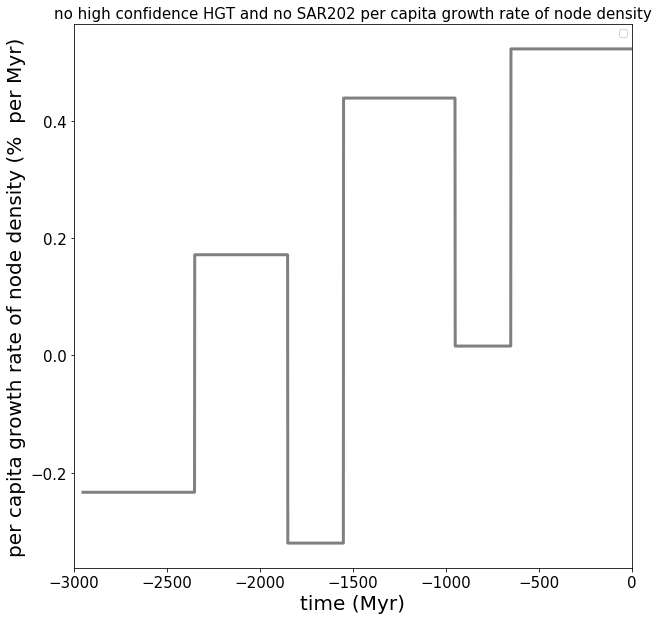

In [113]:
#definition of the pdf
def f_NonAllHGT_and_NonSAR202_X(x):
    if x >= NonAllHGT_and_NonSAR202_array_middle_age_interval_list[0] and x <= NonAllHGT_and_NonSAR202_array_middle_age_interval_list[6]:
        return NonAllHGT_and_NonSAR202_slope_array[0]
    elif x >= NonAllHGT_and_NonSAR202_array_middle_age_interval_list[6] and x <= NonAllHGT_and_NonSAR202_array_middle_age_interval_list[11]:
        return NonAllHGT_and_NonSAR202_slope_array[1]
    elif x >= NonAllHGT_and_NonSAR202_array_middle_age_interval_list[11] and x <= NonAllHGT_and_NonSAR202_array_middle_age_interval_list[14]:
        return NonAllHGT_and_NonSAR202_slope_array[2]
    elif x >= NonAllHGT_and_NonSAR202_array_middle_age_interval_list[14] and x <= NonAllHGT_and_NonSAR202_array_middle_age_interval_list[20]:
        return NonAllHGT_and_NonSAR202_slope_array[3]
    elif x >= NonAllHGT_and_NonSAR202_array_middle_age_interval_list[20] and x <= NonAllHGT_and_NonSAR202_array_middle_age_interval_list[23]:
        return NonAllHGT_and_NonSAR202_slope_array[4]
    else:
        return NonAllHGT_and_NonSAR202_slope_array[5]


#vectorize f_X, so that it takes arrays and inputs!
f_NonAllHGT_and_NonSAR202_X_vec = np.vectorize(f_NonAllHGT_and_NonSAR202_X)

#visualize pdf
plt.figure(figsize=(10,10))
NonAllHGT_and_NonSAR202_x = np.linspace(min(NonAllHGT_and_NonSAR202_array_middle_age_interval_list), 0 , 5000)
plt.plot(NonAllHGT_and_NonSAR202_x, 100*f_NonAllHGT_and_NonSAR202_X_vec(NonAllHGT_and_NonSAR202_x), color='gray', linewidth=3)
plt.xlim(-3000,0)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend()
plt.title("no high confidence HGT and no SAR202 per capita growth rate of node density", size='15')
plt.savefig('no high confidence HGT and no SAR202 divergence rate growth (non-cumulative).jpg')
plt.show()

# Comparison_1

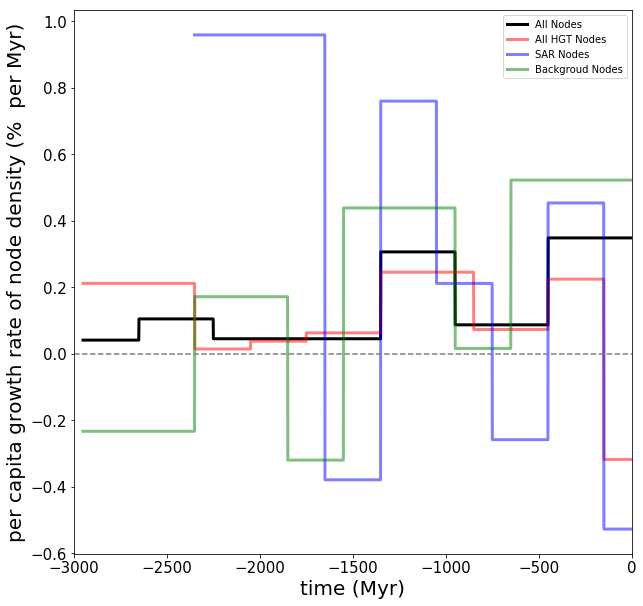

In [114]:
plt.figure(figsize=(10,10))

x_whole = np.linspace(min(whole_array_middle_age_interval_list), 0 , 5000)
x_HGT = np.linspace(min(HGT_array_middle_age_interval_list), 0 , 5000)
SAR_x = np.linspace(min(SAR_array_middle_age_interval_list), 0 , 5000)
NonAllHGT_and_NonSAR202_x = np.linspace(min(NonAllHGT_and_NonSAR202_array_middle_age_interval_list), 0 , 5000)


plt.plot(x_whole, 100*f_X_whole_vec(x_whole), color='black', linewidth=3, label="All Nodes", alpha=1)
plt.plot(x_HGT, 100*f_HGT_X_vec(x_HGT), color='red', linewidth=3, label="All HGT Nodes", alpha=0.5)
plt.plot(SAR_x, 100*f_SAR_X_vec(SAR_x), color='blue', linewidth=3, label="SAR Nodes", alpha=0.5)
plt.plot(NonAllHGT_and_NonSAR202_x, 100*f_NonAllHGT_and_NonSAR202_X_vec(NonAllHGT_and_NonSAR202_x), color='green', linewidth=3, label="Backgroud Nodes", alpha=0.5)

plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)

plt.xlim(-3000, 0)
plt.xlabel('time (Myr)', size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend()
#plt.title("no high confidence HGT and no SAR202 per capita growth rate of node density", size='15')
plt.savefig('Comparison_of_Divergence_Rate_1 (non-cumulative).jpg')
plt.show()

<Figure size 1080x1080 with 0 Axes>

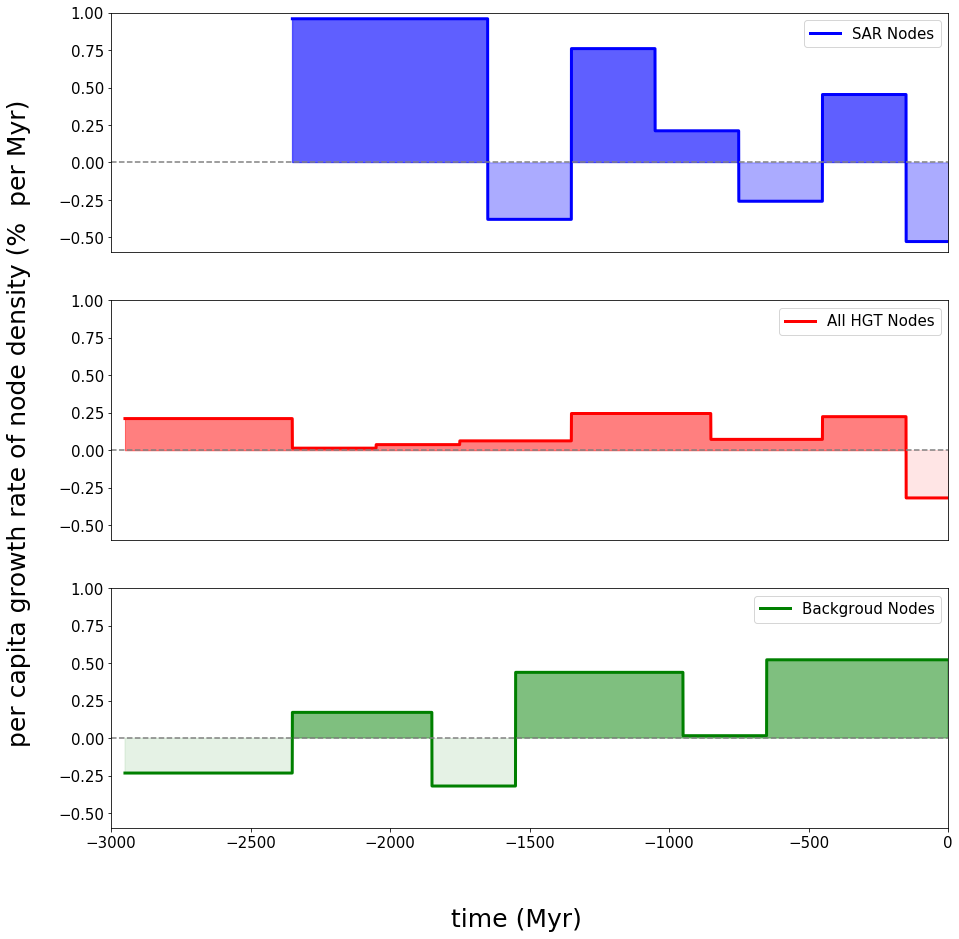

In [115]:
plt.figure(figsize=(15,15))

x_HGT = np.linspace(min(HGT_array_middle_age_interval_list), 0 , 5000)
SAR_x = np.linspace(min(SAR_array_middle_age_interval_list), 0 , 5000)
NonAllHGT_and_NonSAR202_x = np.linspace(min(NonAllHGT_and_NonSAR202_array_middle_age_interval_list), 0 , 5000)

fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(15,15))
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

plt.subplot(3,1,1)
plt.plot(SAR_x, 100*f_SAR_X_vec(SAR_x), color='blue', linewidth=3, label="SAR Nodes", alpha=1)
plt.fill_between(SAR_x, 0, 100*f_SAR_X_vec(SAR_x), color='blue', alpha=.25)
plt.fill_between(SAR_x, 0, 100*f_SAR_X_vec(SAR_x), 100*f_SAR_X_vec(SAR_x) > 0, color='blue', alpha= 0.5)
plt.fill_between(SAR_x, 0, 100*f_SAR_X_vec(SAR_x), 100*f_SAR_X_vec(SAR_x) < 0, color='blue', alpha= 0.1)
plt.xlim(-3000, 0)
plt.ylim(-0.6, 1)
plt.xticks([])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)
plt.legend(prop={'size': 15})


plt.subplot(3,1,2)
plt.plot(x_HGT, 100*f_HGT_X_vec(x_HGT), color='red', linewidth=3, label="All HGT Nodes", alpha=1)
plt.fill_between(x_HGT, 0, 100*f_HGT_X_vec(x_HGT), 100*f_HGT_X_vec(x_HGT) > 0, color='red', alpha=0.5)
plt.fill_between(x_HGT, 0, 100*f_HGT_X_vec(x_HGT), 100*f_HGT_X_vec(x_HGT) < 0, color='red', alpha=0.1)
plt.xlim(-3000, 0)
plt.ylim(-0.6, 1)
plt.xticks([])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)
plt.legend(prop={'size': 15})

plt.subplot(3,1,3)
plt.plot(NonAllHGT_and_NonSAR202_x, 100*f_NonAllHGT_and_NonSAR202_X_vec(NonAllHGT_and_NonSAR202_x), color='green', linewidth=3, label="Backgroud Nodes", alpha=1)
plt.fill_between(NonAllHGT_and_NonSAR202_x, 0, 100*f_NonAllHGT_and_NonSAR202_X_vec(NonAllHGT_and_NonSAR202_x), 100*f_NonAllHGT_and_NonSAR202_X_vec(NonAllHGT_and_NonSAR202_x) > 0, color='green', alpha=0.5)
plt.fill_between(NonAllHGT_and_NonSAR202_x, 0, 100*f_NonAllHGT_and_NonSAR202_X_vec(NonAllHGT_and_NonSAR202_x), 100*f_NonAllHGT_and_NonSAR202_X_vec(NonAllHGT_and_NonSAR202_x) < 0, color='green', alpha=0.1)
plt.xlim(-3000, 0)
plt.ylim(-0.6, 1)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)
plt.legend(prop={'size': 15})


fig.text(0.5, 0.04, 'time (Myr)', va='center', ha='center' ,  size = '25')
fig.text(0.04, 0.5, 'per capita growth rate of node density (%  per Myr)', va='center', ha='center', rotation='vertical', size = '25')

plt.savefig('Comparison_of_Divergence_Rate_1 (non-cumulative).jpg')
plt.show()

# Divergence Rates of all HGT Nodes with 80% confidence and at least one non-leaf recipient

### Extract HGT Nodes from the Tree

In [116]:
with open("Labelled-Gene_Tree.treefile") as f:
    content = f.readlines()

In [117]:
reconciliation_gene_tree = ete3.Tree(content[0],format=8)

In [118]:
print reconciliation_gene_tree


                  /-Streptomycesfulvoviolaceus_WP043457100
                 |
                 |   /-Acidimicrobiaceaebacterium_HAM02975
                 |  |
               /-|  |               /-Mycobacteriumtriplex_WP036469389
              |  |  |            /-|
              |  |  |         /-|   \-Mycobacteriumgenavense_WP025737195
              |  |  |        |  |
              |   \-|      /-|   \-Mycobacteriumconspicuum_WP085231027
              |     |     |  |
              |     |     |  |   /-Mycobacteriumarosiense_WP083064574
              |     |     |   \-|
              |     |   /-|     |   /-Mycobacteriummarseillense_WP067169648
              |     |  |  |      \-|
              |     |  |  |         \-Mycobacteriummarseillense_WP083017212
              |      \-|  |
              |        |   \-Mycobacteriumpalustre_WP085078461
              |        |
              |         \-Mycobacteriumsp12747610_WP066975764
              |
              |               /-Fran

In [119]:
root

[Tree node 'm1' (0x7fc820736f1)]

In [120]:
root = [reconciliation_gene_tree.get_tree_root()]

all_node_TreeInformation = reconciliation_gene_tree.get_descendants()
all_node_TreeInformation = root + all_node_TreeInformation

In [121]:
all_node_TreeInformation

[Tree node 'm1' (0x7fc8214a4c9),
 Tree node 'm2' (0x7fc8214a4e1),
 Tree node 'm301' (0x7fc82262231),
 Tree node 'm3' (0x7fc8214a4fd),
 Tree node 'm230' (0x7fc8217d361),
 Tree node 'm302' (0x7fc822622dd),
 Tree node 'm521' (0x7fc817cf3e5),
 Tree node 'm4' (0x7fc8214a411),
 Tree node 'm227' (0x7fc8217d32d),
 Tree node 'm231' (0x7fc8217d36d),
 Tree node 'm286' (0x7fc82262241),
 Tree node 'm303' (0x7fc821c38fd),
 Tree node 'm396' (0x7fc821e16bd),
 Tree node 'm522' (0x7fc817cf3f5),
 Tree node 'm561' (0x7fc822ede89),
 Tree node 'm5' (0x7fc8214a415),
 Tree node 'm100' (0x7fc820fe8bd),
 Tree node 'SphingomonasspJJA5_WP072597474' (0x7fc8217d365),
 Tree node 'SphingomonasspJJA5_WP072597460' (0x7fc8217d369),
 Tree node 'm232' (0x7fc8217d371),
 Tree node 'm279' (0x7fc82262251),
 Tree node 'm287' (0x7fc82262211),
 Tree node 'm292' (0x7fc8226220d),
 Tree node 'm304' (0x7fc821c3885),
 Tree node 'Thermoflexushugenholtzii_WP098503884' (0x7fc821e160d),
 Tree node 'm397' (0x7fc82212c11),
 Tree node 'Acid

In [122]:
root = [reconciliation_gene_tree.get_tree_root()]
f = open('all_node_TreeInformation', 'r')
lines = f.read()
all_nodes_age_list = re.findall(r"'(.*?)'", lines)
all_nodes_age_list = [i for i in all_nodes_age_list]
all_nodes_age_list.insert(0,'m1')

In [123]:
reconciliation_gene_tree.get_leaves()

[Tree node 'Streptomycesfulvoviolaceus_WP043457100' (0x7fc8214a46d),
 Tree node 'Acidimicrobiaceaebacterium_HAM02975' (0x7fc8214a409),
 Tree node 'Mycobacteriumtriplex_WP036469389' (0x7fc8214a499),
 Tree node 'Mycobacteriumgenavense_WP025737195' (0x7fc8214a4f5),
 Tree node 'Mycobacteriumconspicuum_WP085231027' (0x7fc8214a441),
 Tree node 'Mycobacteriumarosiense_WP083064574' (0x7fc8214a431),
 Tree node 'Mycobacteriummarseillense_WP067169648' (0x7fc8214a4d5),
 Tree node 'Mycobacteriummarseillense_WP083017212' (0x7fc8214a4a5),
 Tree node 'Mycobacteriumpalustre_WP085078461' (0x7fc8214a481),
 Tree node 'Mycobacteriumsp12747610_WP066975764' (0x7fc8214a45d),
 Tree node 'FrankiaspEUN1f_WP006543802' (0x7fc8214a4b1),
 Tree node 'Frankiaasymbiotica_ONH24204' (0x7fc8214a4f1),
 Tree node 'Frankiaasymbiotica_WP081438887' (0x7fc8214a4e5),
 Tree node 'Cryptosporangiumaurantiacum_WP084742125' (0x7fc8214a429),
 Tree node 'Streptomycesscabrisporus_WP078974072' (0x7fc82259e45),
 Tree node 'Streptomycessca

In [124]:
g = open('leaves_children_string', 'r')
lines = g.read()
leaves_nodes_age_list = re.findall(r"'(.*?)'", lines)
leaves_nodes_age_list = [i for i in leaves_nodes_age_list]

In [125]:
all_internal_nodes_list = [x for x in all_nodes_age_list if x not in leaves_nodes_age_list]

In [126]:
# all HGT Nodes with 80% confidence and at least one non-leaf recipient
HGT_internal_nodes_list = ['m108', 'm171', 'm301', 'm309', 'm316', 'm401', 'm413', 'm417', 'm49', 'm522', 
                      'm550', 'm561', 'm564', 'm584', 'm625', 'm626', 'm81', 'm85', 'm10',
                     'm101', 'm104', 'm117', 'm118', 'm12', 'm124', 'm13', 'm140', 'm144', 'm149',
                     'm150', 'm157', 'm164', 'm166', 'm209', 'm210', 'm232', 'm240', 'm247', 'm25',
                     'm254', 'm26', 'm27', 'm272', 'm3', 'm304', 'm333', 'm336', 'm337', 'm338',
                     'm339', 'm345', 'm346', 'm370', 'm371', 'm397', 'm398', 'm41', 'm42', 'm44',
                      'm450', 'm452', 'm563', 'm579', 'm619', 'm637', 'm645', 'm646', 'm71', 'm8']
HGT_internal_nodes_list = list(set(HGT_internal_nodes_list))

In [127]:
HGT_nodes_index = [all_nodes_age_list.index(i) for i in HGT_internal_nodes_list]

In [128]:
# Note that if we let HGT_index = a leave index, then what returned 
# by "tree.get_common_ancestor(HGT_internal_node.get_leaf_names())" will be the root of the tree
HGT_node_on_AgeTree_list = []
for HGT_index in HGT_nodes_index: # iterate the index of HGT node on the reconciliation gene tree
    HGT_internal_node = all_node_TreeInformation[HGT_index] # get ihe information of the HGT node on the reconciliation gene tree
    HGT_internal_node_ancestor = HGT_internal_node.get_leaf_names() # get the leave descendants of this HGT node
    HGT_node_on_AgeTree = tree.get_common_ancestor(HGT_internal_node_ancestor) # use leave descendants of this HGT node to get the HGT node information on the "age tree"\
    HGT_node_on_AgeTree_list.append(HGT_node_on_AgeTree)

In [129]:
a = open('80Confidence_HGT_node_on_AgeTree_list', 'r')
lines = a.read()
HGT_age_list_row_one = re.findall(r"'(\d+\.\d+|\d+)'", lines)
#HGT_age_list_row_one = [float(i) for i in HGT_age_list_row_one]

In [130]:
AgeTree_first_row = df.iloc[0,:].tolist()

In [131]:
HGT_nodes_index_on_AgeTree = [AgeTree_first_row.index(i) for i in HGT_age_list_row_one]

In [132]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = df.iloc[:,HGT_nodes_index_on_AgeTree]
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

In [133]:
min_gae_HGT_age = np.min(negative_age_list_1)
min_gae_HGT_age  

-3968.66

### Divergence of Node Numbers in Each Bin (NOT Cumulative Number of Nodes)

In [134]:
bin_size = 100
his_data_eight_calibration_1 = np.histogram(negative_age_list_1, bins=3000/bin_size, range = (-3000, 0))
age_interval_list = his_data_eight_calibration_1[1]
age_interval_list = age_interval_list.tolist()
middle_age_interval_list = [left_age + (bin_size/float(2)) for left_age in age_interval_list]
del middle_age_interval_list[-1]
middle_age_interval_list

node_number_each_interval = his_data_eight_calibration_1[0]
node_number_each_interval = node_number_each_interval.tolist()

In [135]:
# Divide node number in each bin by the total number of trees
# Let's call this "normalized node number in a bin" 
node_number_each_interval_normalized_by_tree_number = [i / float(len(df_list_1)) for i in node_number_each_interval]

# Divide normalized node number in a bin by the bin size (that is, node number pre Myr)
# Let's call this "normalized node density"
node_density_each_interval_normalized_by_tree_number = [i / float(bin_size) for i in node_number_each_interval_normalized_by_tree_number]

In [136]:
# The average omega here is calculated from theroectial formula: average omega = (log(N2)-log(N1))/t, 
# where t is bin_size. The average_omega is calculated from the two end points when t = 
#-2950 (i.e. -3000Ma + 50 Ma) and t = -50 Ma; actually, 50 Ma = 0.5 * bin_size.
noncumulative_density_avergae_omega = (np.log(node_number_each_interval_normalized_by_tree_number[-1]) - np.log(node_number_each_interval_normalized_by_tree_number[0])) / float(3000-bin_size)
noncumulative_density_avergae_omega

0.0004586553815499635

In [137]:
# Take the logarithm of each  "normalized node density"
log_node_density_each_interval_normalized_by_tree_number = [np.log(i) for i in node_density_each_interval_normalized_by_tree_number]
HighConfidenceHGT_log_node_density_each_interval_normalized_by_tree_number = log_node_density_each_interval_normalized_by_tree_number
HighConfidenceHGT_log_node_density_each_interval_normalized_by_tree_number = np.asarray(HighConfidenceHGT_log_node_density_each_interval_normalized_by_tree_number)
HighConfidenceHGT_log_node_density_each_interval_normalized_by_tree_number

array([-5.36396762, -5.28795458, -5.38192545, -5.64979749, -5.59436769,
       -5.21827466, -4.84737445, -4.67500046, -4.6834133 , -4.79817359,
       -4.89598215, -4.91745807, -4.84043113, -4.65646348, -4.45035009,
       -4.35631828, -4.36079529, -4.30506559, -4.06039614, -3.7088696 ,
       -3.46249117, -3.58705644, -3.25892501, -3.26708998, -2.90526334,
       -2.92885274, -2.67440389, -2.52478508, -2.53275195, -4.03386701])

In [138]:
# Change the list of "middle point at each time interval" to an array
array_middle_age_interval_list = np.array(middle_age_interval_list)
HighConfidenceHGT_array_middle_age_interval_list = array_middle_age_interval_list
HighConfidenceHGT_array_middle_age_interval_list

array([-2950., -2850., -2750., -2650., -2550., -2450., -2350., -2250.,
       -2150., -2050., -1950., -1850., -1750., -1650., -1550., -1450.,
       -1350., -1250., -1150., -1050.,  -950.,  -850.,  -750.,  -650.,
        -550.,  -450.,  -350.,  -250.,  -150.,   -50.])

In [139]:
# Data here are the slopes computed using SMA (alos called reduced major axis regresion) in "lmodel2" in R
slope_array = np.array([0.0006526183, -0.0016320255,  0.0015628565, -0.0006901817,  0.0008816827, -0.0010264725,  0.0008586353,
                       0.0035453719, -0.0008183727,  0.0007880886,  0.0036856771,  0.0009832275])
HighHGTConfidence_slope_array = slope_array

In [140]:
intercept_array = np.array([-3.3326809, -9.6331301, -1.2255294, -6.3121939, -3.2206000, -6.5632962, -3.6571154, -0.5742799, -4.7154628,
                           -3.3569848, -1.4242085, -2.7494308])

HighHGTConfidence_intercept_array = intercept_array
HighHGTConfidence_intercept_array 

array([-3.3326809, -9.6331301, -1.2255294, -6.3121939, -3.2206   ,
       -6.5632962, -3.6571154, -0.5742799, -4.7154628, -3.3569848,
       -1.4242085, -2.7494308])

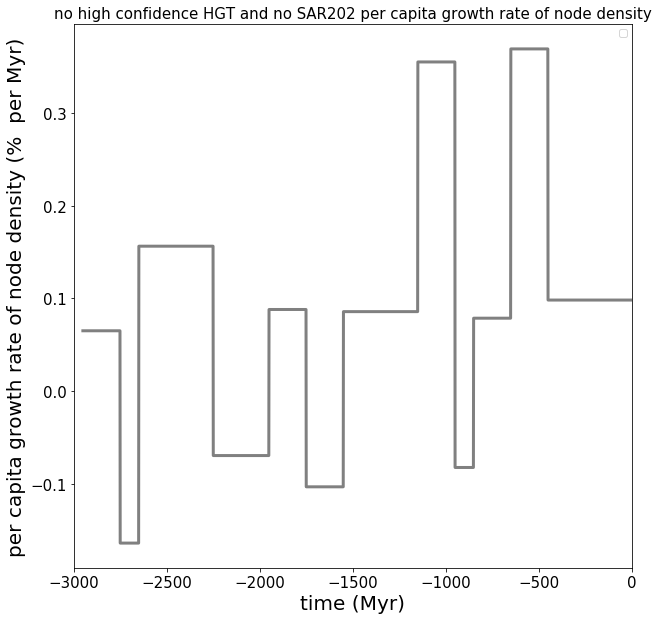

In [141]:
#definition of the pdf
def f_HighConfidenceHGT(x):
    if x >= HighConfidenceHGT_array_middle_age_interval_list[0] and x <= HighConfidenceHGT_array_middle_age_interval_list[2]:
        return HighHGTConfidence_slope_array [0]
    elif x >= HighConfidenceHGT_array_middle_age_interval_list [2] and x <= HighConfidenceHGT_array_middle_age_interval_list[3]:
        return HighHGTConfidence_slope_array [1]
    elif x >=  HighConfidenceHGT_array_middle_age_interval_list[3] and x <= HighConfidenceHGT_array_middle_age_interval_list [7]:
        return HighHGTConfidence_slope_array [2]
    elif x >=  HighConfidenceHGT_array_middle_age_interval_list [7] and x <= HighConfidenceHGT_array_middle_age_interval_list[10]:
        return HighHGTConfidence_slope_array [3]
    elif x >=  HighConfidenceHGT_array_middle_age_interval_list[10] and x <= HighConfidenceHGT_array_middle_age_interval_list[12]:
        return HighHGTConfidence_slope_array [4]
    elif x >=  HighConfidenceHGT_array_middle_age_interval_list[12] and x <= HighConfidenceHGT_array_middle_age_interval_list[14]:
        return HighHGTConfidence_slope_array [5]
    elif x >=  HighConfidenceHGT_array_middle_age_interval_list[14] and x <= HighConfidenceHGT_array_middle_age_interval_list[18]:
        return HighHGTConfidence_slope_array [6]
    elif x >=  HighConfidenceHGT_array_middle_age_interval_list[18] and x <= HighConfidenceHGT_array_middle_age_interval_list[20]:
        return HighHGTConfidence_slope_array [7]
    elif x >=  HighConfidenceHGT_array_middle_age_interval_list[20] and x <=  HighConfidenceHGT_array_middle_age_interval_list[21]:
        return HighHGTConfidence_slope_array [8]
    elif x >=  HighConfidenceHGT_array_middle_age_interval_list[21] and x <=  HighConfidenceHGT_array_middle_age_interval_list[23]:
        return HighHGTConfidence_slope_array [9]
    elif x >=  HighConfidenceHGT_array_middle_age_interval_list[23] and x <=  HighConfidenceHGT_array_middle_age_interval_list[25]:
        return HighHGTConfidence_slope_array [10]
    else:
        return HighHGTConfidence_slope_array [11]
    
#vectorize f_X, so that it takes arrays and inputs!
f_HighConfidenceHGT_X_vec = np.vectorize(f_HighConfidenceHGT)
#visualize pdf
plt.figure(figsize=(10,10))
HighConfidenceHGT_array_middle_age_interval = np.linspace(min(HighConfidenceHGT_array_middle_age_interval_list), 0 , 5000)
plt.plot(HighConfidenceHGT_array_middle_age_interval, 100*f_HighConfidenceHGT_X_vec(HighConfidenceHGT_array_middle_age_interval), color='gray', linewidth=3)
plt.xlim(-3000,0)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend()
plt.title("no high confidence HGT and no SAR202 per capita growth rate of node density", size='15')
plt.savefig('no high confidence HGT and no SAR202 divergence rate growth (non-cumulative).jpg')
plt.show()

In [142]:
#definition of the pdf
def g_HighConfidenceHGT_X(x):
    if x >= HighConfidenceHGT_array_middle_age_interval_list[0]  and x <= HighConfidenceHGT_array_middle_age_interval_list[2]:
        return x * HighHGTConfidence_slope_array [0] + HighHGTConfidence_intercept_array[0]
    elif x >= HighConfidenceHGT_array_middle_age_interval_list [2] and x <= HighConfidenceHGT_array_middle_age_interval_list[3]:
        return x * HighHGTConfidence_slope_array [1] + HighHGTConfidence_intercept_array[1]
    elif x >=  HighConfidenceHGT_array_middle_age_interval_list[3] and x <= HighConfidenceHGT_array_middle_age_interval_list [7]:
        return x * HighHGTConfidence_slope_array [2] + HighHGTConfidence_intercept_array[2]
    elif x >=  HighConfidenceHGT_array_middle_age_interval_list [7] and x <= HighConfidenceHGT_array_middle_age_interval_list[10]:
        return x * HighHGTConfidence_slope_array [3] + HighHGTConfidence_intercept_array[3]
    elif x >=  HighConfidenceHGT_array_middle_age_interval_list[10] and x <= HighConfidenceHGT_array_middle_age_interval_list[12]:
        return x * HighHGTConfidence_slope_array [4] + HighHGTConfidence_intercept_array[4]
    elif x >=  HighConfidenceHGT_array_middle_age_interval_list[12] and x <= HighConfidenceHGT_array_middle_age_interval_list[14]:
        return x * HighHGTConfidence_slope_array [5] + HighHGTConfidence_intercept_array[5]
    elif x >=  HighConfidenceHGT_array_middle_age_interval_list[14] and x <= HighConfidenceHGT_array_middle_age_interval_list[18]:
        return x * HighHGTConfidence_slope_array [6] + HighHGTConfidence_intercept_array[6]
    elif x >=  HighConfidenceHGT_array_middle_age_interval_list[18] and x <= HighConfidenceHGT_array_middle_age_interval_list[20]:
        return x * HighHGTConfidence_slope_array [7] + HighHGTConfidence_intercept_array[7]
    elif x >=  HighConfidenceHGT_array_middle_age_interval_list[20] and x <=  HighConfidenceHGT_array_middle_age_interval_list[21]:
        return x * HighHGTConfidence_slope_array [8] + HighHGTConfidence_intercept_array[8]
    elif x >=  HighConfidenceHGT_array_middle_age_interval_list[21] and x <=  HighConfidenceHGT_array_middle_age_interval_list[23]:
        return x * HighHGTConfidence_slope_array [9] + HighHGTConfidence_intercept_array[9]
    elif x >=  HighConfidenceHGT_array_middle_age_interval_list[23] and x <=  HighConfidenceHGT_array_middle_age_interval_list[25]:
        return x * HighHGTConfidence_slope_array [10] + HighHGTConfidence_intercept_array[10]
    else:
        return x * HighHGTConfidence_slope_array [11] + HighHGTConfidence_intercept_array[11]


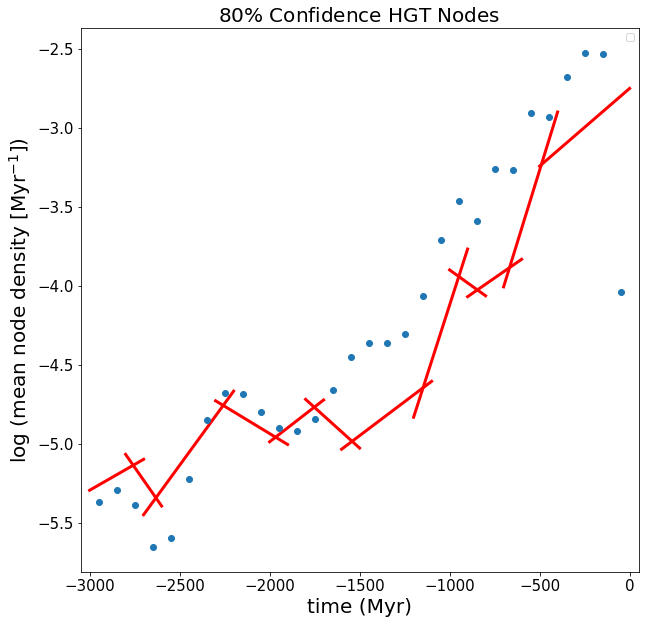

In [143]:
HighConfidenceHGT_age_index = [0, 2, 3, 7, 10, 12, 14, 18, 20, 21, 23, 25, 29]

plt.subplots(1, 1, figsize=(10, 10))
for i in range (0, len(HighConfidenceHGT_age_index)-1):
    x = np.linspace(HighConfidenceHGT_array_middle_age_interval_list[HighConfidenceHGT_age_index[i]] - (bin_size/2.), HighConfidenceHGT_array_middle_age_interval_list[HighConfidenceHGT_age_index[i+1]] + (bin_size/2.), 100)
    plt.plot(x, x * HighHGTConfidence_slope_array[i]  + HighHGTConfidence_intercept_array[i], color='red', linewidth=3)
plt.plot(HighConfidenceHGT_array_middle_age_interval_list, HighConfidenceHGT_log_node_density_each_interval_normalized_by_tree_number, 'o')
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('log (mean node density [Myr$^{-1}$])', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('$80\%$ Confidence HGT Nodes',  size = '20')
plt.legend()
plt.savefig('HGT divergence rate growth (non-cumulative) with fitting.jpg', dpi=500)
plt.show()

# Divergence Rates WITHOUT High Confidence HGT Nodes and WITHOUT SAR202 Clade Nodes

In [144]:
f = open('children_string', 'r')
lines = f.read()
SAR202_age_list_row_one = re.findall(r"\d+\.\d+", lines)
SAR202_age_list_row_one = [float(i) for i in SAR202_age_list_row_one]

In [145]:
df_list_row_one = df.iloc[0]
df_list_row_one = df_list_row_one.values.tolist()
df_list_row_one = [float(i) for i in df_list_row_one]

In [146]:
Internal_node_SAR202_clade_list = []
for element in SAR202_age_list_row_one:
    if element in df_list_row_one:
        Internal_node_SAR202_clade_list.append(df_list_row_one.index(element))

In [147]:
SAR202_age_list =  df.iloc[:, Internal_node_SAR202_clade_list]

In [148]:
len(nodes_NonHGT_and_NonSAR202)

3840

In [149]:
nodes_NonHGT_and_NonSAR202_column_index =  Internal_node_SAR202_clade_list + HGT_nodes_index_on_AgeTree

In [150]:
nodes_NonHGT_and_NonSAR202 = df.drop(df.columns[nodes_NonHGT_and_NonSAR202_column_index], axis=1) 

In [ ]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = nodes_NonHGT_and_NonSAR202
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

In [ ]:
min_nodes_NonHGT_and_NonSAR202_age = np.min(negative_age_list_1)
min_nodes_NonHGT_and_NonSAR202_age  ### Divergence of Node Numbers in Each Bin (NOT Cumulative Number of Nodes)

### Divergence of Node Numbers in Each Bin (NOT Cumulative Number of Nodes)

In [ ]:
# Divergence Rates WITHOUT All HGT Nodes and WITHOUT SAR202 Clade Nodes# Divergence Rates WITHOUT All HGT Nodes and WITHOUT SAR202 Clade Nodesbin_size = 100
his_data_eight_calibration_1 = np.histogram(negative_age_list_1, bins=3000/bin_size, range = (-3000, 0))
age_interval_list = his_data_eight_calibration_1[1]
age_interval_list = age_interval_list.tolist()
middle_age_interval_list = [left_age + (bin_size/float(2)) for left_age in age_interval_list]
del middle_age_interval_list[-1]
middle_age_interval_list

node_number_each_interval = his_data_eight_calibration_1[0]
node_number_each_interval = node_number_each_interval.tolist()

In [ ]:
# Divide node number in each bin by the total number of trees
# Let's call this "normalized node number in a bin" 
node_number_each_interval_normalized_by_tree_number = [i / float(len(df_list_1)) for i in node_number_each_interval]

# Divide normalized node number in a bin by the bin size (that is, node number pre Myr)
# Let's call this "normalized node density"
node_density_each_interval_normalized_by_tree_number = [i / float(bin_size) for i in node_number_each_interval_normalized_by_tree_number]

In [ ]:
# The average omega here is calculated from theroectial formula: average omega = (log(N2)-log(N1))/t, 
# where t is bin_size. The average_omega is calculated from the two end points when t = 
#-2950 (i.e. -3000Ma + 50 Ma) and t = -50 Ma; actually, 50 Ma = 0.5 * bin_size.
noncumulative_density_avergae_omega = (np.log(node_number_each_interval_normalized_by_tree_number[-1]) - np.log(node_number_each_interval_normalized_by_tree_number[0])) / float(3000-bin_size)
noncumulative_density_avergae_omega

In [ ]:
# Take the logarithm of each  "normalized node density"
log_node_density_each_interval_normalized_by_tree_number = [np.log(i) for i in node_density_each_interval_normalized_by_tree_number]

In [ ]:
# Change the list of "middle point at each time interval" to an array
array_middle_age_interval_list = np.array(middle_age_interval_list)

# Change the list of "normalized node density" to an array
array_node_density_each_interval_normalized_by_tree_number = np.array(node_density_each_interval_normalized_by_tree_number)

In [ ]:
# Change the list of "middle point at each time interval" to an array
array_log_node_density_each_interval_normalized_by_tree_number = np.array(log_node_density_each_interval_normalized_by_tree_number)
NonHighConfidenceHGT_and_NonSAR202_log = array_log_node_density_each_interval_normalized_by_tree_number
NonHighConfidenceHGT_and_NonSAR202_log 

In [ ]:
# Change the list of "middle point at each time interval" to an array
array_middle_age_interval_list = np.array(middle_age_interval_list)
NonHighConfidenceHGT_array_middle_age_interval_list = array_middle_age_interval_list
NonHighConfidenceHGT_array_middle_age_interval_list

In [ ]:
# Data here are the slopes computed using SMA (alos called reduced major axis regresion) in "lmodel2" in R
slope_array = np.array([8.172322e-05,  1.212901e-03,  5.312434e-04, -1.881540e-04,  1.312840e-03,  3.191749e-03,  5.655499e-04, 3.396104e-03])
NonHighConfidenceHGT_slope_array = slope_array
NonHighConfidenceHGT_slope_array

In [ ]:
# Data here are the intercepts computed using SMA (alos called reduced major axis regresion) in "lmodel2" in R
intercept_array = np.array([-4.4114048,-1.3100645,-2.9916205,-4.3874704,-1.8832407, 0.4601011,-2.0803983,-0.3872919])
NonHighConfidenceHGT_intercept_array = intercept_array
NonHighConfidenceHGT_intercept_array 

In [ ]:
#definition of the piecewise fitting lines
def f_NonHighConfidenceHGT_X(x):
    if x >= NonHighConfidenceHGT_array_middle_age_interval_list[0] and x < NonHighConfidenceHGT_array_middle_age_interval_list[2]:
        return  NonHighConfidenceHGT_slope_array[0]
    elif x >= NonHighConfidenceHGT_array_middle_age_interval_list[2] and x < NonHighConfidenceHGT_array_middle_age_interval_list[5]:
        return  NonHighConfidenceHGT_slope_array[1] 
    elif x >= NonHighConfidenceHGT_array_middle_age_interval_list[5] and x < NonHighConfidenceHGT_array_middle_age_interval_list[10]:
        return  NonHighConfidenceHGT_slope_array[2] 
    elif x >= NonHighConfidenceHGT_array_middle_age_interval_list[10] and x < NonHighConfidenceHGT_array_middle_age_interval_list[13]:
        return  NonHighConfidenceHGT_slope_array[3] 
    elif x >= NonHighConfidenceHGT_array_middle_age_interval_list[13] and x < NonHighConfidenceHGT_array_middle_age_interval_list[17]:
        return NonHighConfidenceHGT_slope_array[4] 
    elif x >= NonHighConfidenceHGT_array_middle_age_interval_list[17] and x < NonHighConfidenceHGT_array_middle_age_interval_list[20]:
        return NonHighConfidenceHGT_slope_array[5] 
    elif x >= NonHighConfidenceHGT_array_middle_age_interval_list[20] and x < NonHighConfidenceHGT_array_middle_age_interval_list[23]:
        return NonHighConfidenceHGT_slope_array[6]
    else:
        return NonHighConfidenceHGT_slope_array[7] 

In [ ]:
#vectorize f_X, so that it takes arrays and inputs!
f_NonHighConfidenceHGT_X_vec = np.vectorize(f_NonHighConfidenceHGT_X)

#visualize pdf
plt.figure(figsize=(10,10))
NonHighConfidenceHGT_x = np.linspace(min(NonHighConfidenceHGT_array_middle_age_interval_list), 0 , 5000)
plt.plot(NonHighConfidenceHGT_x, 100*f_NonHighConfidenceHGT_X_vec(NonHighConfidenceHGT_x), color='gray', linewidth=3)
plt.xlim(-3000,0)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend()
plt.title("NonSAR202 and NonHGT per capita growth rate of node density", size='15')
plt.savefig('NonSAR202 and NonHGT divergence rate growth (non-cumulative).jpg')
plt.show()

In [ ]:
#definition of the piecewise fitting lines
def g_NonHighConfidenceHGT_X(x):
    if x >= NonHighConfidenceHGT_array_middle_age_interval_list[0] and x < NonHighConfidenceHGT_array_middle_age_interval_list[2]:
        return  x * NonHighConfidenceHGT_slope_array[0]  + NonHighConfidenceHGT_intercept_array [0]
    elif x >= NonHighConfidenceHGT_array_middle_age_interval_list[2] and x < NonHighConfidenceHGT_array_middle_age_interval_list[5]:
        return  x * NonHighConfidenceHGT_slope_array[1]  + NonHighConfidenceHGT_intercept_array [1]
    elif x >= NonHighConfidenceHGT_array_middle_age_interval_list[5] and x < NonHighConfidenceHGT_array_middle_age_interval_list[10]:
        return  x * NonHighConfidenceHGT_slope_array[2]  + NonHighConfidenceHGT_intercept_array [2]
    elif x >= NonHighConfidenceHGT_array_middle_age_interval_list[10] and x < NonHighConfidenceHGT_array_middle_age_interval_list[13]:
        return  x * NonHighConfidenceHGT_slope_array[3]  + NonHighConfidenceHGT_intercept_array [3]
    elif x >= NonHighConfidenceHGT_array_middle_age_interval_list[13] and x < NonHighConfidenceHGT_array_middle_age_interval_list[17]:
        return  x * NonHighConfidenceHGT_slope_array[4]  + NonHighConfidenceHGT_intercept_array [4]
    elif x >= NonHighConfidenceHGT_array_middle_age_interval_list[17] and x < NonHighConfidenceHGT_array_middle_age_interval_list[20]:
        return  x * NonHighConfidenceHGT_slope_array[5]  + NonHighConfidenceHGT_intercept_array [5]
    elif x >= NonHighConfidenceHGT_array_middle_age_interval_list[20] and x < NonHighConfidenceHGT_array_middle_age_interval_list[23]:
        return  x * NonHighConfidenceHGT_slope_array[6]  + NonHighConfidenceHGT_intercept_array [6]
    elif x >= NonHighConfidenceHGT_array_middle_age_interval_list[23] and x < NonHighConfidenceHGT_array_middle_age_interval_list[29]:
        return  x * NonHighConfidenceHGT_slope_array[7]  + NonHighConfidenceHGT_intercept_array [7]
    else:
        pass

In [ ]:
NonHighConfidenceHGT_age_index = [0, 2, 5, 10, 13, 17, 20, 23, 29]
#visualize pdf

plt.subplots(1, 1, figsize=(10, 10))
for i in range (0, len(NonHighConfidenceHGT_age_index )-1):
    x = np.linspace(NonHighConfidenceHGT_array_middle_age_interval_list[NonHighConfidenceHGT_age_index[i]] - (bin_size/2.), NonHighConfidenceHGT_array_middle_age_interval_list[NonHighConfidenceHGT_age_index[i+1]] + (bin_size/2.), 100)
    plt.plot(x, x * NonHighConfidenceHGT_slope_array[i]  + NonHighConfidenceHGT_intercept_array[i], color='red', linewidth=3)
plt.plot(NonHighConfidenceHGT_array_middle_age_interval_list, NonHighConfidenceHGT_and_NonSAR202_log , 'o')
plt.xlim(-3000, 0)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('log (mean node density [Myr$^{-1}$])', size = '20')
plt.title('Background Nodes',  size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend()
plt.savefig('HGT divergence rate growth (non-cumulative) with fitting.jpg', dpi=500)
plt.show()

# Comparison_2

In [ ]:
plt.figure(figsize=(10,10))

x_whole = np.linspace(min(whole_array_middle_age_interval_list), 0 , 5000)
HighConfidenceHGT_array_middle_age_interval = np.linspace(min(HighConfidenceHGT_array_middle_age_interval_list), 0 , 5000)
SAR_x = np.linspace(min(SAR_array_middle_age_interval_list), 0 , 5000)
NonHighConfidenceHGT_x = np.linspace(min(NonHighConfidenceHGT_array_middle_age_interval_list), 0 , 5000)

plt.plot(x_whole, 100*f_X_whole_vec(x_whole), color='black', linewidth=3, label="All Nodes", alpha=1)
plt.plot(HighConfidenceHGT_array_middle_age_interval, 100*f_HighConfidenceHGT_X_vec(HighConfidenceHGT_array_middle_age_interval), color='red', linewidth=3, label="High Confidence HGT Nodes", alpha=0.5)
plt.plot(SAR_x, 100*f_SAR_X_vec(SAR_x), color='blue', linewidth=3, label="SAR Nodes", alpha=0.5)
plt.plot(NonHighConfidenceHGT_x, 100*f_NonHighConfidenceHGT_X_vec(NonHighConfidenceHGT_x), color='green', linewidth=3, label="Backgroud Nodes", alpha=0.5)

plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)

plt.xlim(-3000, 0)
plt.xlabel('time (Myr)', size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend()
#plt.title("no high confidence HGT and no SAR202 per capita growth rate of node density", size='15')
plt.savefig('Comparison_of_Divergence_Rate_2 (non-cumulative).jpg')
plt.show()

In [1231]:
NonHighConfidenceHGT_array_middle_age_interval_list

array([-2950., -2850., -2750., -2650., -2550., -2450., -2350., -2250.,
       -2150., -2050., -1950., -1850., -1750., -1650., -1550., -1450.,
       -1350., -1250., -1150., -1050.,  -950.,  -850.,  -750.,  -650.,
        -550.,  -450.,  -350.,  -250.,  -150.,   -50.])

In [1232]:
SAR_array_middle_age_interval_list

array([-2350., -2250., -2150., -2050., -1950., -1850., -1750., -1650.,
       -1550., -1450., -1350., -1250., -1150., -1050.,  -950.,  -850.,
        -750.,  -650.,  -550.,  -450.,  -350.,  -250.,  -150.,   -50.])

In [1233]:
HighConfidenceHGT_array_middle_age_interval_list

array([-2950., -2850., -2750., -2650., -2550., -2450., -2350., -2250.,
       -2150., -2050., -1950., -1850., -1750., -1650., -1550., -1450.,
       -1350., -1250., -1150., -1050.,  -950.,  -850.,  -750.,  -650.,
        -550.,  -450.,  -350.,  -250.,  -150.,   -50.])

<Figure size 1080x2160 with 0 Axes>

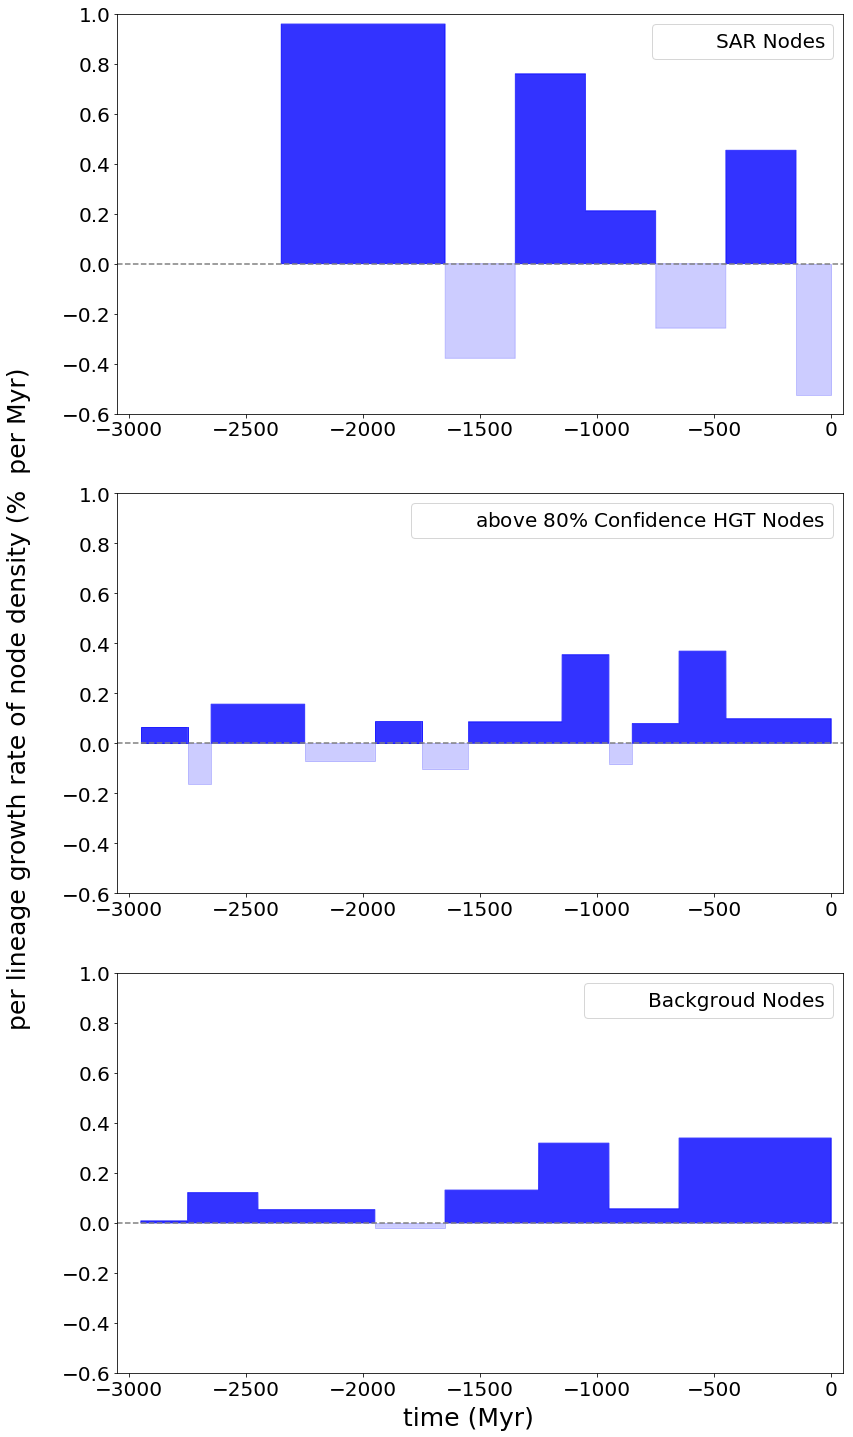

In [1260]:
plt.figure(figsize=(15,30))

HighConfidenceHGT_array_middle_age_interval = np.linspace(min(HighConfidenceHGT_array_middle_age_interval_list), 0 , 5000)
SAR_x = np.linspace(min(SAR_array_middle_age_interval_list), 0 , 5000)
NonHighConfidenceHGT_x = np.linspace(min(NonHighConfidenceHGT_array_middle_age_interval_list), 0 , 5000)

fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(13,25))
plt.tick_params(labelcolor='none', top=False, bottom=True, left=False, right=False)

plt.subplot(3,1,1)
plt.plot(SAR_x, 100*f_SAR_X_vec(SAR_x), color='white', linewidth=0.1, label="SAR Nodes", alpha=1)
plt.fill_between(SAR_x, 0, 100*f_SAR_X_vec(SAR_x), 100*f_SAR_X_vec(SAR_x) > 0, color='blue', alpha= 0.8)
plt.fill_between(SAR_x, 0, 100*f_SAR_X_vec(SAR_x), 100*f_SAR_X_vec(SAR_x) < 0, color='blue', alpha=0.2)
plt.xlim(-3050, 50)
plt.ylim(-0.6, 1)
#plt.xticks([])
plt.tick_params(axis='both', which='major', labelsize=20)
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)
plt.legend(prop={'size': 20})

plt.subplot(3,1,2)
plt.plot(HighConfidenceHGT_array_middle_age_interval, 100*f_HighConfidenceHGT_X_vec(HighConfidenceHGT_array_middle_age_interval), color='white', linewidth=0.1, label="above $80\%$ Confidence HGT Nodes", alpha=1)
plt.fill_between(HighConfidenceHGT_array_middle_age_interval, 0, 100*f_HighConfidenceHGT_X_vec(HighConfidenceHGT_array_middle_age_interval), 100*f_HighConfidenceHGT_X_vec(HighConfidenceHGT_array_middle_age_interval) > 0, color='blue', alpha=0.8)
plt.fill_between(HighConfidenceHGT_array_middle_age_interval, 0, 100*f_HighConfidenceHGT_X_vec(HighConfidenceHGT_array_middle_age_interval), 100*f_HighConfidenceHGT_X_vec(HighConfidenceHGT_array_middle_age_interval) < 0, color='blue', alpha=0.2)
plt.xlim(-3050, 50)
plt.ylim(-0.6, 1)
#plt.xticks([])
plt.tick_params(axis='both', which='major', labelsize=20)
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)
plt.legend(prop={'size': 20})

plt.subplot(3,1,3)
plt.plot(NonHighConfidenceHGT_x, 100*f_NonHighConfidenceHGT_X_vec(NonHighConfidenceHGT_x), color='white', linewidth=0.1, label="Backgroud Nodes", alpha=1)
plt.fill_between(NonHighConfidenceHGT_x, 0, 100*f_NonHighConfidenceHGT_X_vec(NonHighConfidenceHGT_x), 100*f_NonHighConfidenceHGT_X_vec(NonHighConfidenceHGT_x) > 0, color='blue', alpha=0.8)
plt.fill_between(NonHighConfidenceHGT_x, 0, 100*f_NonHighConfidenceHGT_X_vec(NonHighConfidenceHGT_x), 100*f_NonHighConfidenceHGT_X_vec(NonHighConfidenceHGT_x) < 0, color='blue', alpha=0.2)
plt.xlim(-3050, 50)
plt.ylim(-0.6, 1)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)
plt.legend(prop={'size': 20})


fig.text(0.5, 0.1, 'time (Myr)', va='center', ha='center' ,  size = '25')
fig.text(0.02, 0.5, 'per lineage growth rate of node density (%  per Myr)', va='center', ha='center', rotation='vertical', size = '25')

plt.savefig('Comparison_of_Divergence_Rate_2 (non-cumulative).jpg')
plt.show()

In [1253]:
NonHighConfidenceHGT_x

array([-2.95000000e+03, -2.94940988e+03, -2.94881976e+03, ...,
       -1.18023605e+00, -5.90118024e-01,  0.00000000e+00])

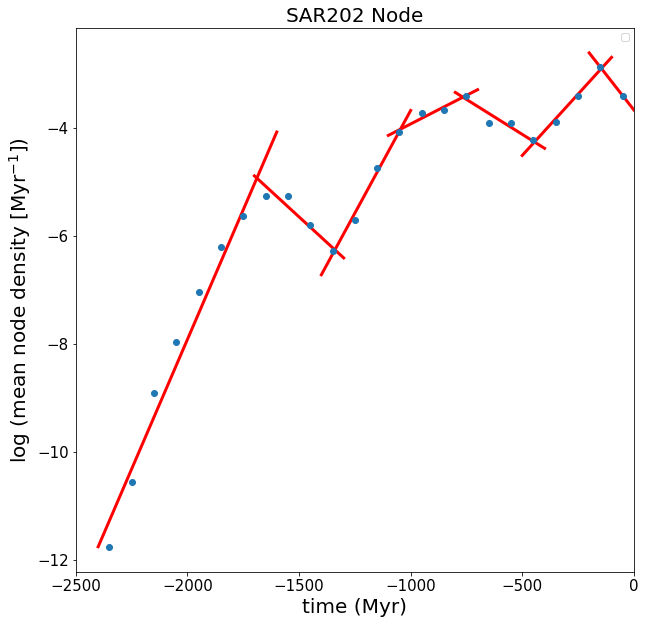

In [1170]:
SAR_age_index = [0, 7, 10, 13, 16, 19, 22, 23]
#visualize pdf
plt.subplots(1, 1, figsize=(10, 10))
for i in range (0, len(SAR_age_index)-1):
    x = np.linspace(SAR_array_middle_age_interval_list[SAR_age_index[i]] - (bin_size/2.), SAR_array_middle_age_interval_list[SAR_age_index[i+1]] + (bin_size/2.), 100)
    plt.plot(x, x * SAR_slope_array[i]  + SAR_intercept_array[i], color='red', linewidth=3)
plt.plot(SAR_array_middle_age_interval_list , SAR_array_log_node_density_each_interval_normalized_by_tree_number , 'o')
plt.xlim(-2500, 0)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('log (mean node density [Myr$^{-1}$])', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('SAR202 Node', size = '20')
plt.legend()
#plt.yscale('log', basey= 10)
plt.savefig('SAR202 divergence rate growth (non-cumulative) with fitting.jpg', dpi=500)
plt.show()

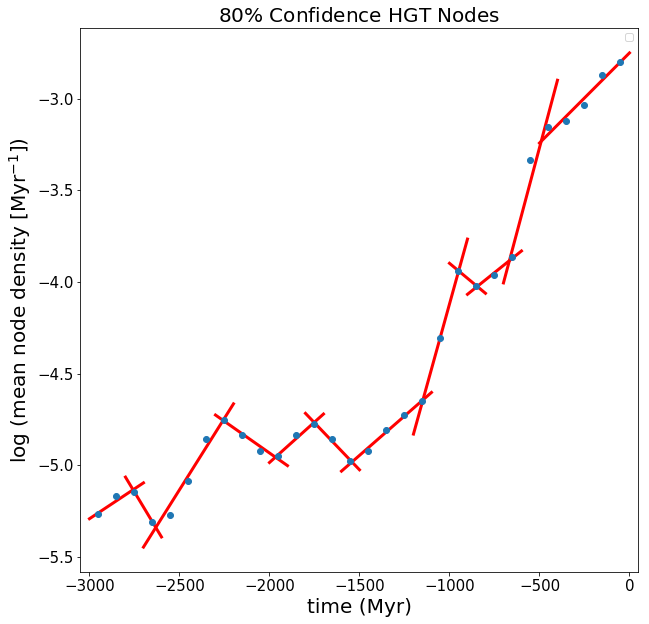

In [1169]:
HighConfidenceHGT_age_index = [0, 2, 3, 7, 10, 12, 14, 18, 20, 21, 23, 25, 29]
#visualize pdf
plt.subplots(1, 1, figsize=(10, 10))
for i in range (0, len(HighConfidenceHGT_age_index)-1):
    x = np.linspace(HighConfidenceHGT_array_middle_age_interval_list[HighConfidenceHGT_age_index[i]] - (bin_size/2.), HighConfidenceHGT_array_middle_age_interval_list[HighConfidenceHGT_age_index[i+1]] + (bin_size/2.), 100)
    plt.plot(x, x * HighHGTConfidence_slope_array[i]  + HighHGTConfidence_intercept_array[i], color='red', linewidth=3)
plt.plot(HighConfidenceHGT_array_middle_age_interval_list, HighConfidenceHGT_log_node_density_each_interval_normalized_by_tree_number, 'o')
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('log (mean node density [Myr$^{-1}$])', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('$80\%$ Confidence HGT Nodes',  size = '20')
plt.legend()
plt.savefig('HGT divergence rate growth (non-cumulative) with fitting.jpg', dpi=500)
plt.show()

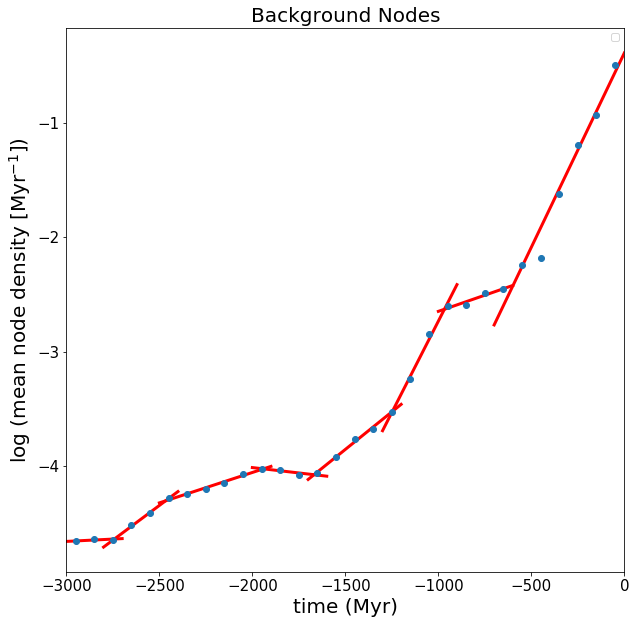

In [1174]:
NonHighConfidenceHGT_age_index = [0, 2, 5, 10, 13, 17, 20, 23, 29]
#visualize pdf
plt.subplots(1, 1, figsize=(10, 10))
for i in range (0, len(NonHighConfidenceHGT_age_index )-1):
    x = np.linspace(NonHighConfidenceHGT_array_middle_age_interval_list[NonHighConfidenceHGT_age_index[i]] - (bin_size/2.), NonHighConfidenceHGT_array_middle_age_interval_list[NonHighConfidenceHGT_age_index[i+1]] + (bin_size/2.), 100)
    plt.plot(x, x * NonHighConfidenceHGT_slope_array[i]  + NonHighConfidenceHGT_intercept_array[i], color='red', linewidth=3)
plt.plot(NonHighConfidenceHGT_array_middle_age_interval_list, NonHighConfidenceHGT_and_NonSAR202_log , 'o')
plt.xlim(-3000, 0)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('log (mean node density [Myr$^{-1}$])', size = '20')
plt.title('Background Nodes',  size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend()
plt.savefig('background divergence rate growth (non-cumulative) with fitting.jpg', dpi=500)
plt.show()

<Figure size 1080x2160 with 0 Axes>

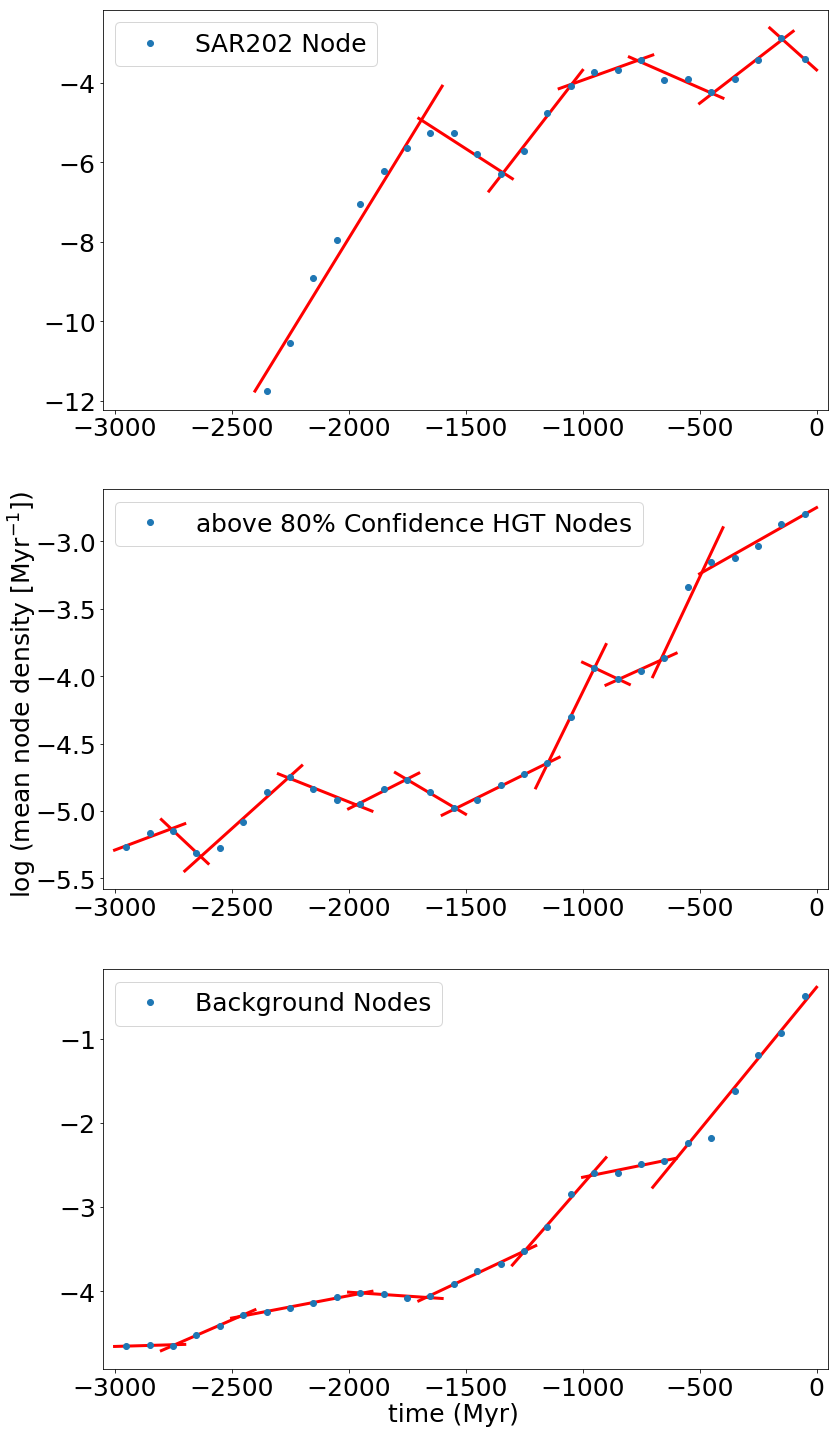

In [1261]:
plt.figure(figsize=(15,30))

HighConfidenceHGT_array_middle_age_interval = np.linspace(min(HighConfidenceHGT_array_middle_age_interval_list), 0 , 5000)
SAR_x = np.linspace(min(SAR_array_middle_age_interval_list), 0 , 5000)
NonHighConfidenceHGT_x = np.linspace(min(NonHighConfidenceHGT_array_middle_age_interval_list), 0 , 5000)

fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(13,25))
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

plt.subplot(3,1,1)
SAR_age_index = [0, 7, 10, 13, 16, 19, 22, 23]
for i in range (0, len(SAR_age_index)-1):
    x = np.linspace(SAR_array_middle_age_interval_list[SAR_age_index[i]] - (bin_size/2.), SAR_array_middle_age_interval_list[SAR_age_index[i+1]] + (bin_size/2.), 100)
    plt.plot(x, x * SAR_slope_array[i]  + SAR_intercept_array[i], color='red', linewidth=3)
plt.plot(SAR_array_middle_age_interval_list , SAR_array_log_node_density_each_interval_normalized_by_tree_number , 'o', label='SAR202 Node')
plt.xlim(-3050, 50)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.legend(prop={'size': 25})


plt.subplot(3,1,2)
HighConfidenceHGT_age_index = [0, 2, 3, 7, 10, 12, 14, 18, 20, 21, 23, 25, 29]
for i in range (0, len(HighConfidenceHGT_age_index)-1):
    x = np.linspace(HighConfidenceHGT_array_middle_age_interval_list[HighConfidenceHGT_age_index[i]] - (bin_size/2.), HighConfidenceHGT_array_middle_age_interval_list[HighConfidenceHGT_age_index[i+1]] + (bin_size/2.), 100)
    plt.plot(x, x * HighHGTConfidence_slope_array[i]  + HighHGTConfidence_intercept_array[i], color='red', linewidth=3)
plt.plot(HighConfidenceHGT_array_middle_age_interval_list, HighConfidenceHGT_log_node_density_each_interval_normalized_by_tree_number, 'o', label='above $80\%$ Confidence HGT Nodes')
plt.xlim(-3050, 50)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.legend(prop={'size': 25})

plt.subplot(3,1,3)
NonHighConfidenceHGT_age_index = [0, 2, 5, 10, 13, 17, 20, 23, 29]
for i in range (0, len(NonHighConfidenceHGT_age_index )-1):
    x = np.linspace(NonHighConfidenceHGT_array_middle_age_interval_list[NonHighConfidenceHGT_age_index[i]] - (bin_size/2.), NonHighConfidenceHGT_array_middle_age_interval_list[NonHighConfidenceHGT_age_index[i+1]] + (bin_size/2.), 100)
    plt.plot(x, x * NonHighConfidenceHGT_slope_array[i]  + NonHighConfidenceHGT_intercept_array[i], color='red', linewidth=3)
plt.plot(NonHighConfidenceHGT_array_middle_age_interval_list, NonHighConfidenceHGT_and_NonSAR202_log , 'o', label = 'Background Nodes')
plt.xlim(-3050, 50)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.legend(prop={'size': 25})


fig.text(0.5, 0.1, 'time (Myr)', va='center', ha='center' ,  size = '25')
fig.text(0.04, 0.5, 'log (mean node density [Myr$^{-1}$])', va='center', ha='center', rotation='vertical', size = '25')

plt.savefig('Comparison_of_Fitting_2 (non-cumulative).jpg')
plt.show()